# Simulating Neuro-Computational feature from Izhikevich model

*Author: Vincenzo Gargano*

**2 Variables**
$(u,w)$: $u$ is the fast voltage variable (n-shaped nullcline) and $w$ is the slow recovery variable (sigmoidal nullcline)

**5 Parameters:** 
$(a, b, I)$: Determining the behavior of the system
$(c, d)$: Affecting after-spike behavior

**General Equations:**
$\frac{du}{dt} = I + u^2 - w$ 
$\frac{dw}{dt} = a(bu - w)$

**Paper Equations:**
$\frac{du}{dt} = 0.04*u^2$ + 5*u + 140 - w + I
$\frac{dw}{dt} = a(bu - w)$

**Reset condition**
$\text{if}: u \geq 30$,
$u \leftarrow c$, $w \leftarrow w + d$


In [1]:
import numpy as np
from izhikevich_model import *
import matplotlib.pyplot as plt
# use seaborne
#import seaborn as sns

In [2]:
T = 2000
T1 = 200
I = np.zeros(T)

current_input = 14

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

# make current I go from -20 to 0
#I[:T//2] = -20 + 20*np.arange(T//2)/T

# cosine current
#I = 20*np.cos(np.arange(T)/T*40*np.pi)

izhikevich = IzhikevichModel(a = 0.02, b = 0.2, c = -65, d = 6, I = I, u = -70, w = 0.2*-70)

#izhikevich_bursting = IzhikevichModel()

In [3]:
# plot the behavior of the model
t, u, w, spikes = izhikevich.simulate(T=T, I=I)

## Showing phase portrait





In [4]:
def draw_phase_portrait(variables_after_simulation, title):
    """Draw the phase portrait of the Izhikevich model

    Args:
        variables_after_simulation (tuple): Tuple containing the variables after the simulation
    """
    u, w = variables_after_simulation
    
    # normalize u and w
    #u = (u - np.min(u)) / (np.max(u) - np.min(u))
    
    # last point
    u_last = u[-1]
    w_last = w[-1]

    plt.plot(u, w)
    # draw red dot for last value   
    plt.plot(u_last, w_last, 'ro')
    plt.title(title)
    plt.xlabel('u')
    plt.ylabel('w')
    
    plt.show() 

In [5]:
def draw_spiking_behaviour(t, u, I, spikes, T1, offset=0):
    """
    Draw the spiking behavior of the Izhikevich model
    
    Args:
        t (np.array): time array
        u (np.array): membrane potential array
        I (np.array): current array
        T1 (int): Time at which current changes from 0 to some input
    """ 
    plt.figure(figsize=(20, 10))
    
    plt.subplot(1, 1, 1)
    
    plt.plot(t, u, label='u')
  
    # show current below the plot
    
    # change behaviour of plot current below if I is a list
    
    # check if I is a list
    if isinstance(I, list):
    #if I[T1] == I[T1-1]:
        # at each step go -100
        # create a vector with -100 same lengh as I
        graphical_fix_vector = np.ones(len(I)) * + 100 + offset
        plt.plot(t, I-graphical_fix_vector, label = 'I')
    else:
        plt.plot(t, I-100, label='I')
    
    
    #plt.plot([0, T1, T1, 100], [-90 , -90, -80, -80], 'k--')
    
    plt.axis('off')
    
    plt.show()
    

## Example of a generic behavior

(-9.995000000000001, 209.895, -106.5, 36.5)

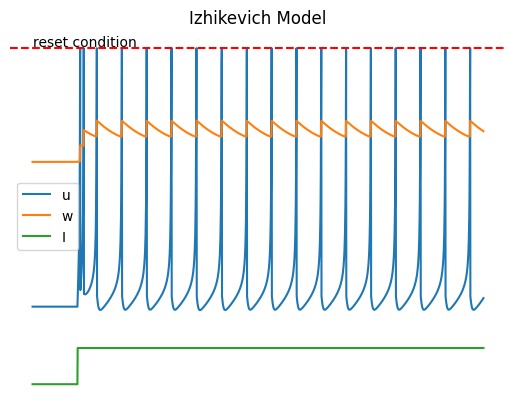

In [6]:
# plot the behavior of the model
# create subplot

plt.plot(t, u, label='u')
plt.plot(t, w, label='w')
plt.xlabel('Time (ms)') 
# red horizontal line at 30mV and text saying reset condition
plt.axhline(y=30, color='r', linestyle='--')
plt.text(0, 31, 'reset condition')

# plot current
plt.plot(t, I-100, label='I')

plt.ylabel('Voltage (mV)')
plt.legend()
plt.title('Izhikevich Model')

plt.axis('off')

# Results and Neuro-Comp Features 

In [7]:
# Current

T = 500
T1 = 20
I = np.zeros(T)

current_input = 14

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

## 1. Tonic Spiking

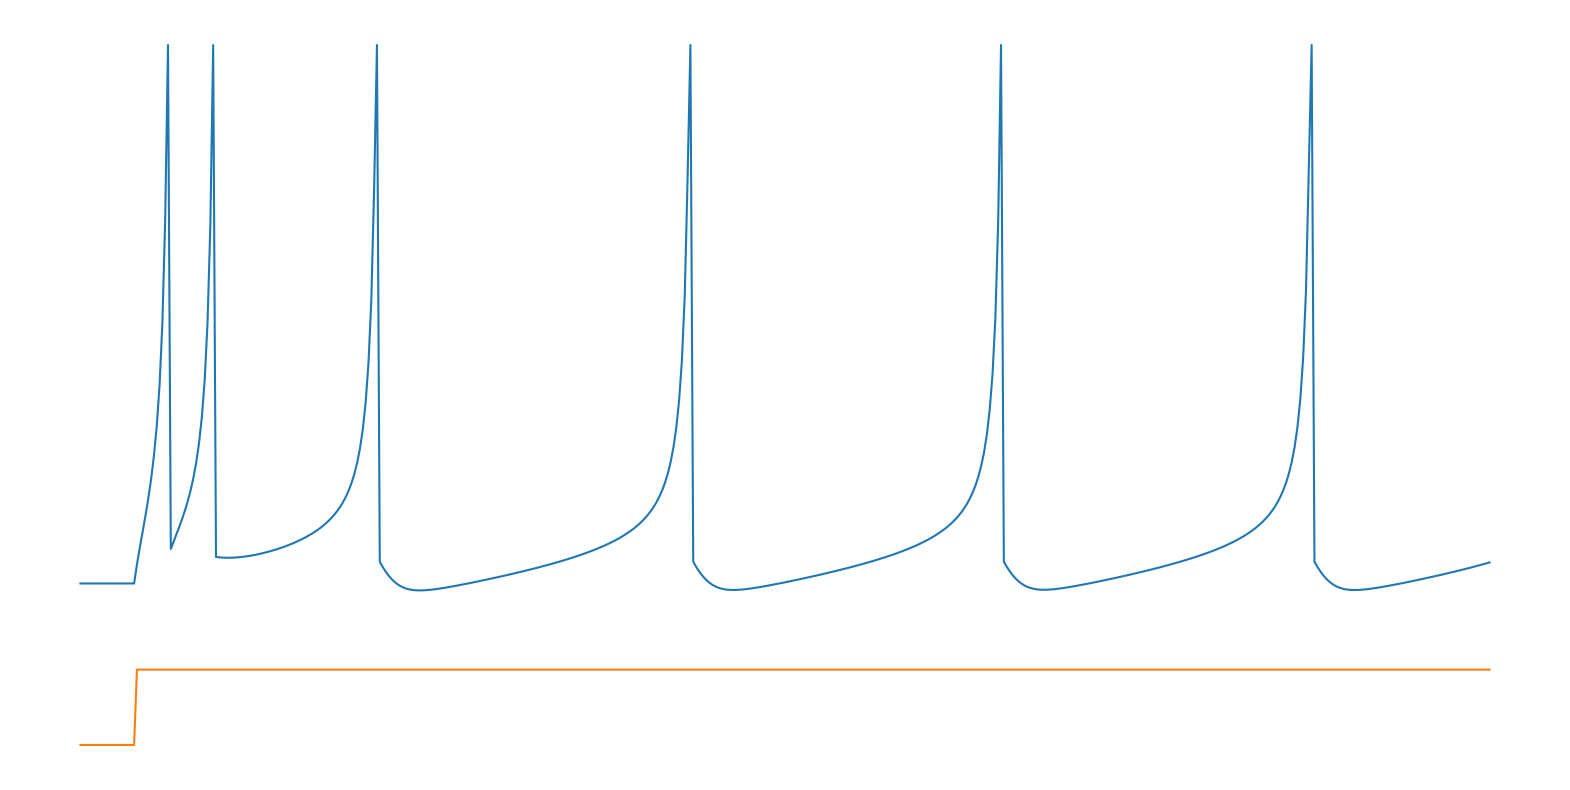

In [8]:
tonic_spiking = IzhikevichModel(a = 0.02, b = 0.2, c = -65, d = 6, I = I, u = -70, w = 0.2*-70)

# Simulate the model
t, u, w, spikes = tonic_spiking.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

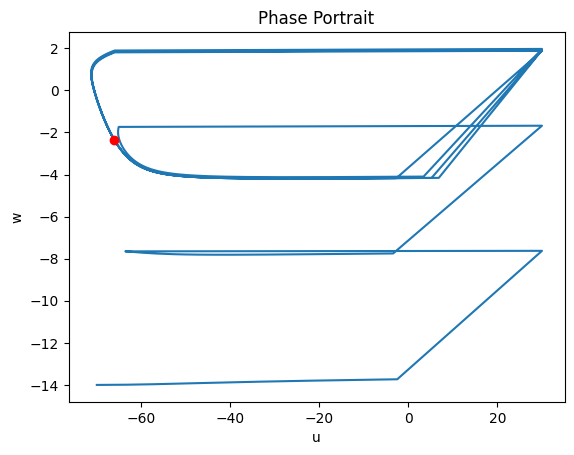

In [9]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 2. Phasic Spiking

In [10]:
# Current

T = 500
T1 = 20
I = np.zeros(T)

current_input = 0.5

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

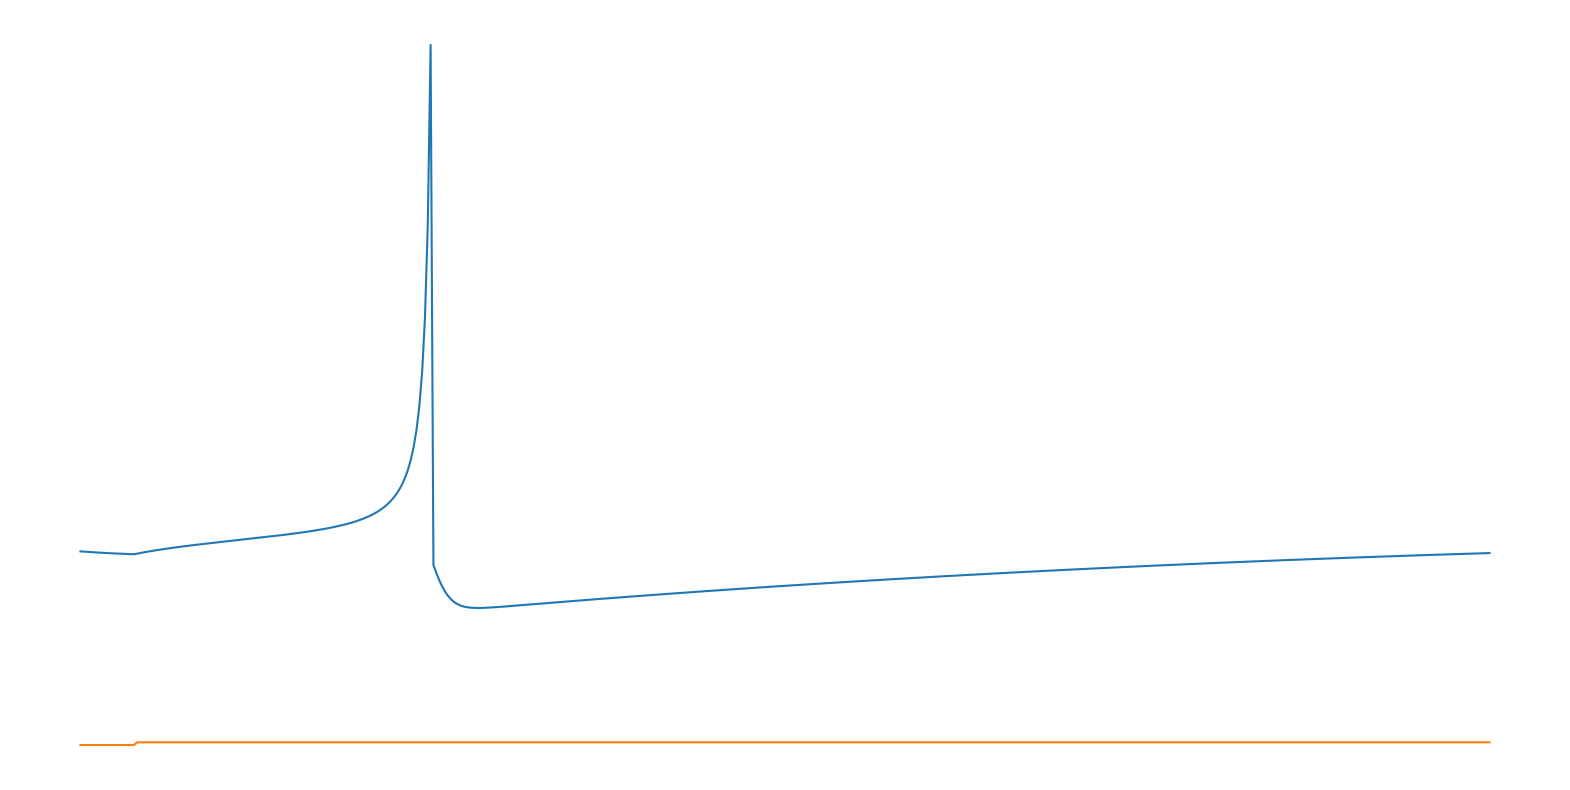

In [11]:
phasic_spike = IzhikevichModel(a = 0.02, b = 0.25, c = -65, d = 6, I = I, u = -64, w = 0.25*-64)

# Simulate the model
t, u, w, spikes = phasic_spike.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

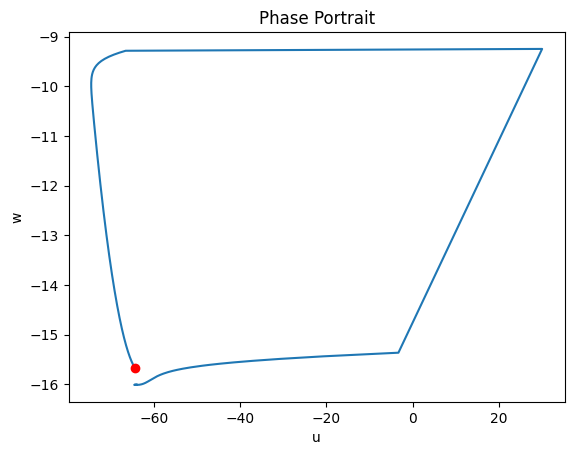

In [12]:
draw_phase_portrait((u, w), 'Phase Portrait')

## 3. Tonic Bursting

In [13]:
# Current

T = 500
T1 = 20
I = np.zeros(T)

current_input = 15

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

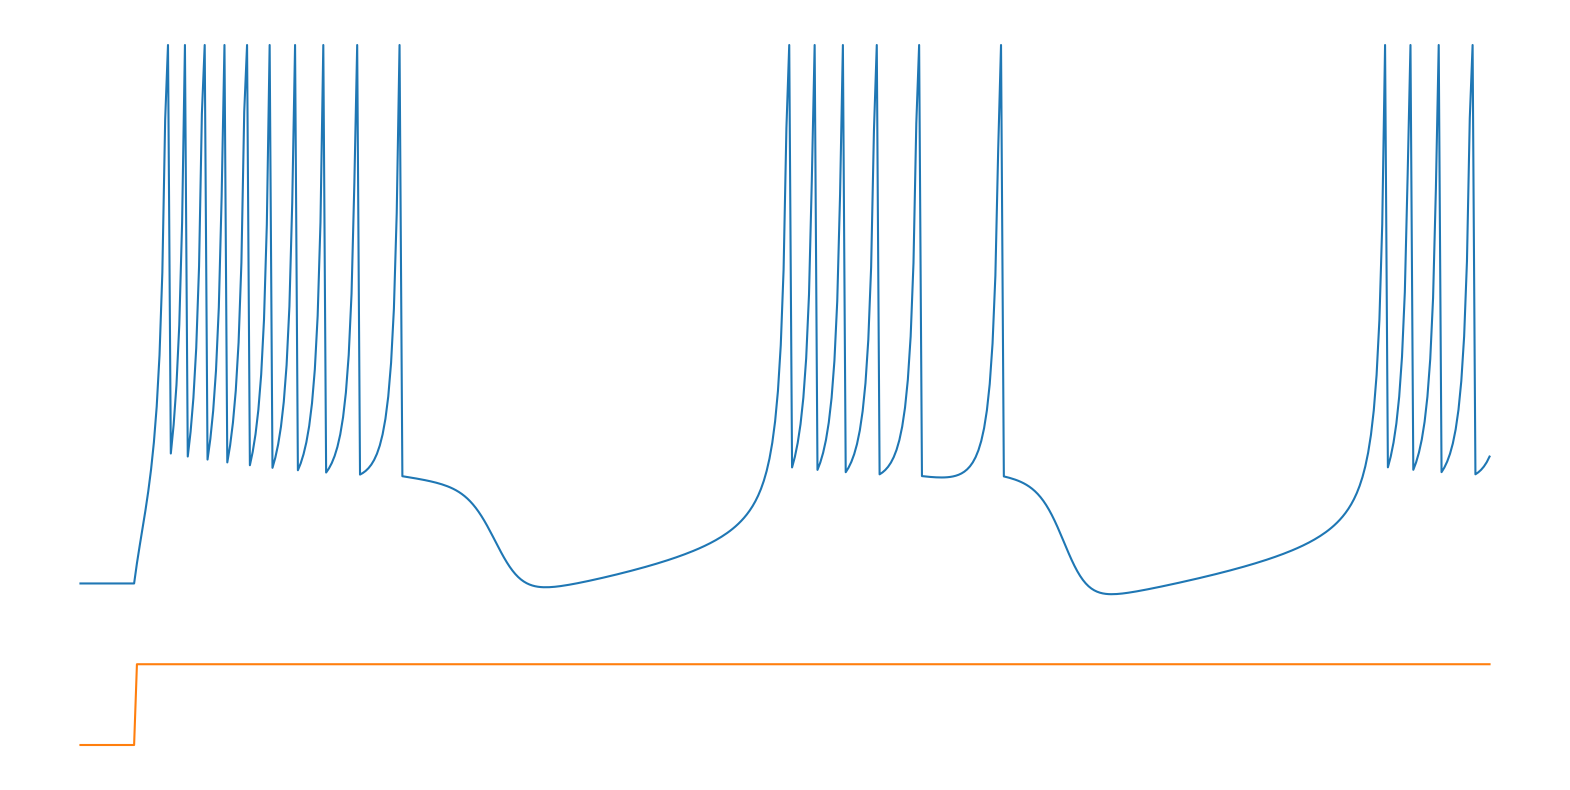

In [14]:
tonic_bursting = IzhikevichModel(a = 0.02, b = 0.2, c = -50, d = 2, I = I, u = -70, w = 0.2*-70)

# Simulate the model
t, u, w, spikes = tonic_bursting.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

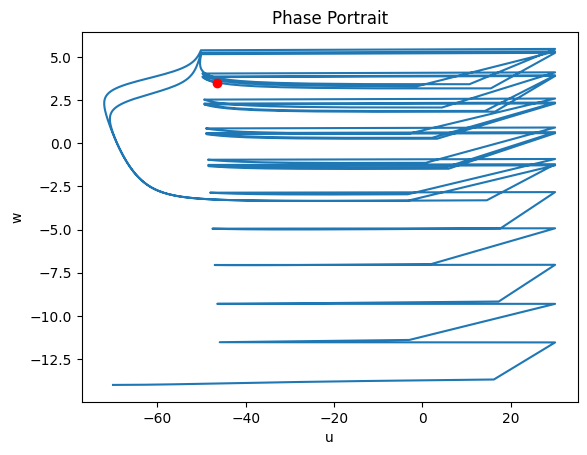

In [15]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 4. Phasic Bursting

In [16]:
# Current

T = 500
T1 = 20
I = np.zeros(T)

current_input = 0.6

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

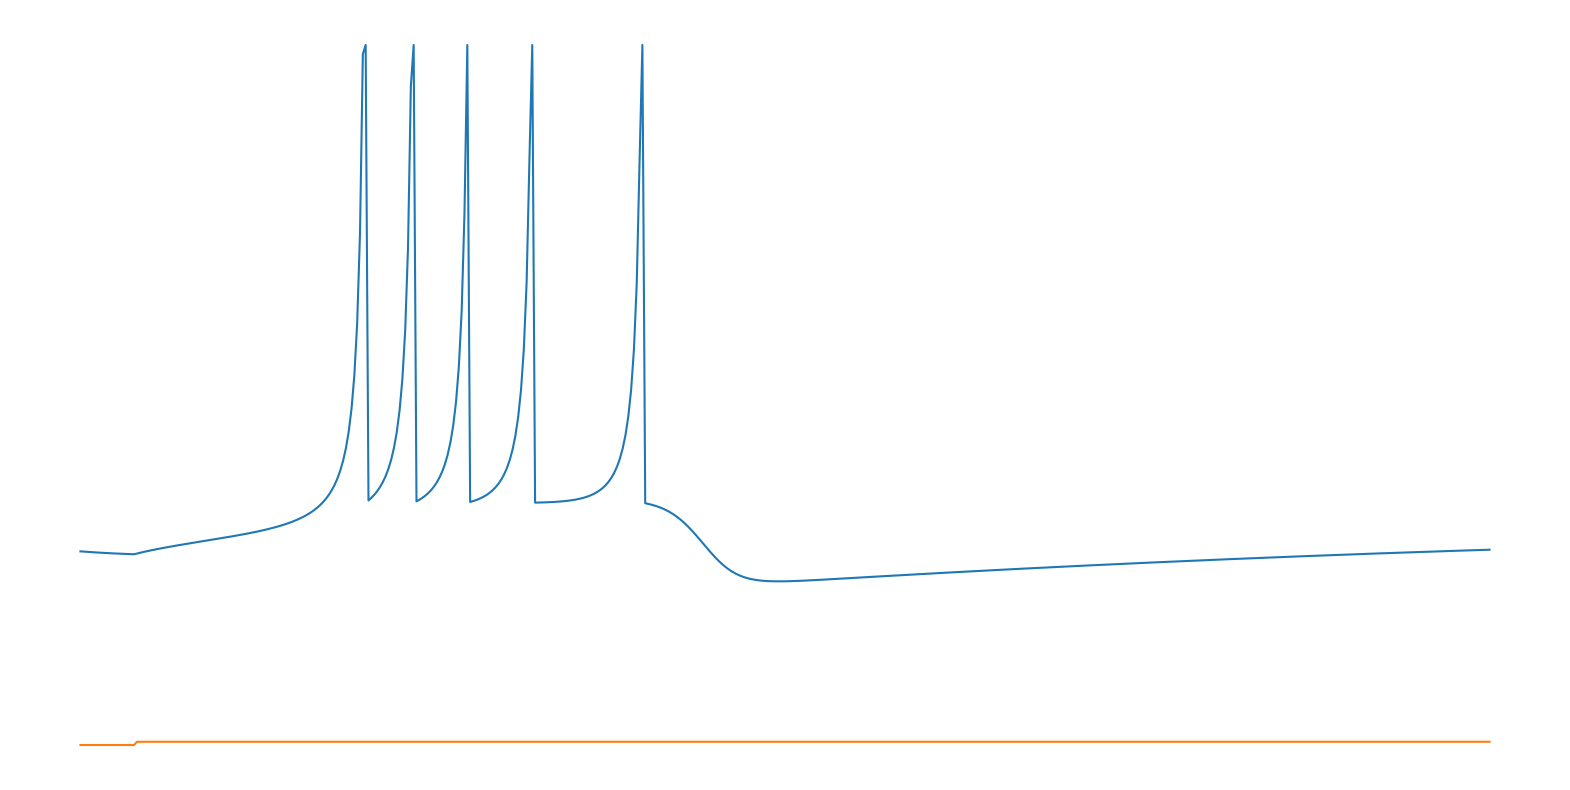

In [17]:
phasic_bursting = IzhikevichModel(a = 0.02, b = 0.25, c = -55, d = 0.05, I = I, u = -64, w = 0.25*-64)

# Simulate the model
t, u, w, spikes = phasic_bursting.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

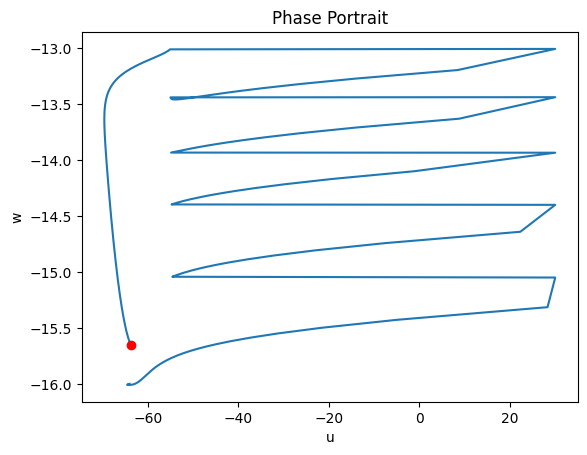

In [18]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 5. Mixed Mode

In [19]:
# Current

T = 500
T1 = 20
I = np.zeros(T)

current_input = 10

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

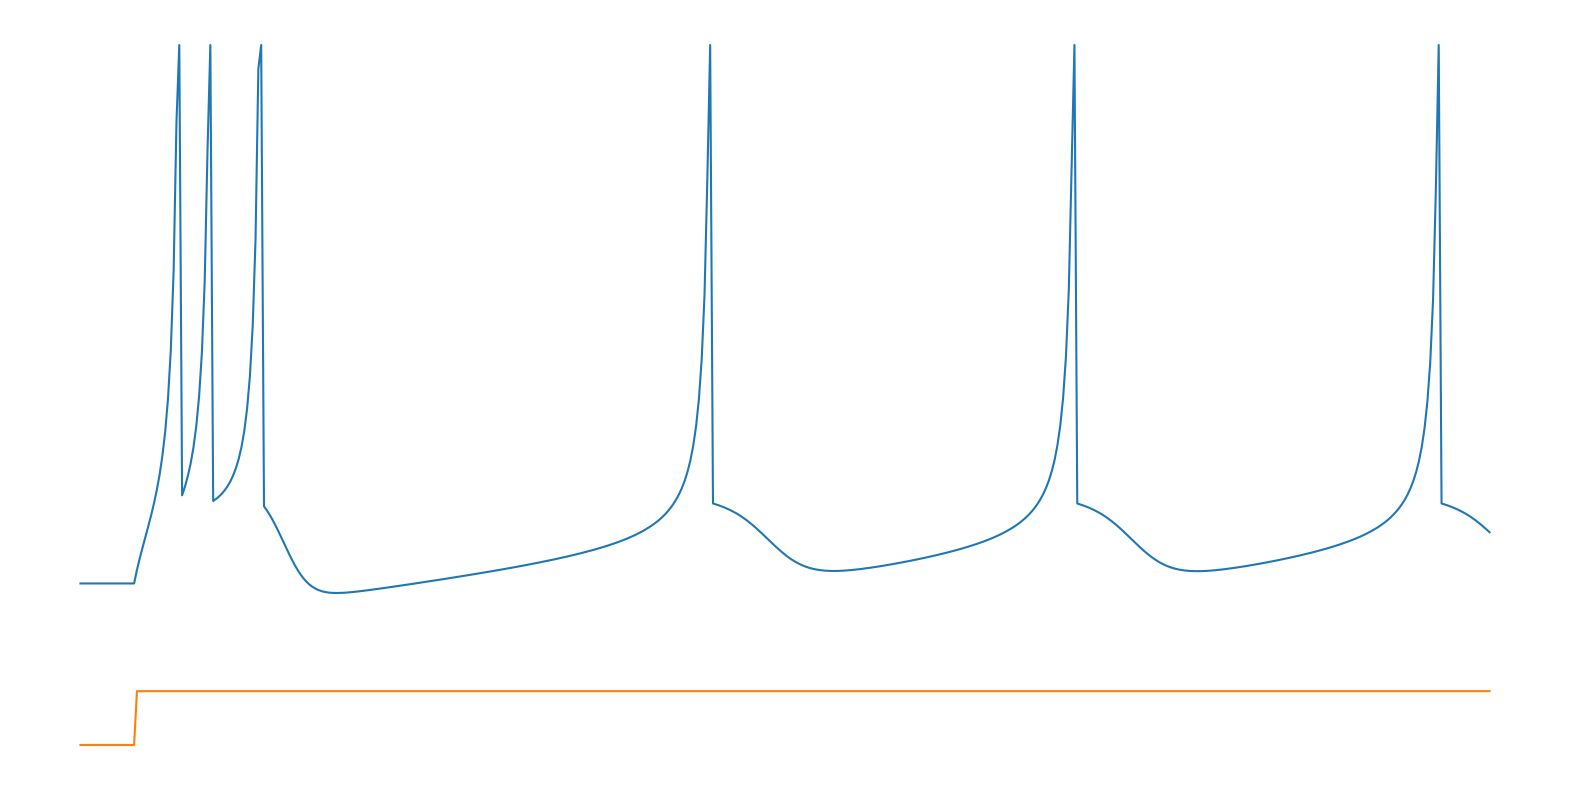

In [20]:
mixed_mode = IzhikevichModel(a = 0.02, b = 0.2, c = -55, d = 4, I = I, u = -70, w = 0.2*-70)

# Simulate the model
t, u, w, spikes = mixed_mode.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

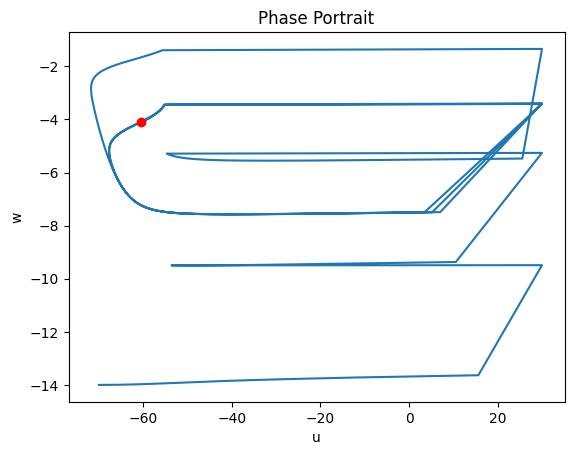

In [21]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 6. Spike Frequency Adaptation


In [22]:
# Current

T = 500
T1 = 20
I = np.zeros(T)

current_input = 30

#I = np.full(T, 20)

# current is 0 the first 200 and 14 until the end
I[:T1] = 0
I[T1:] = np.full(T-T1, current_input)

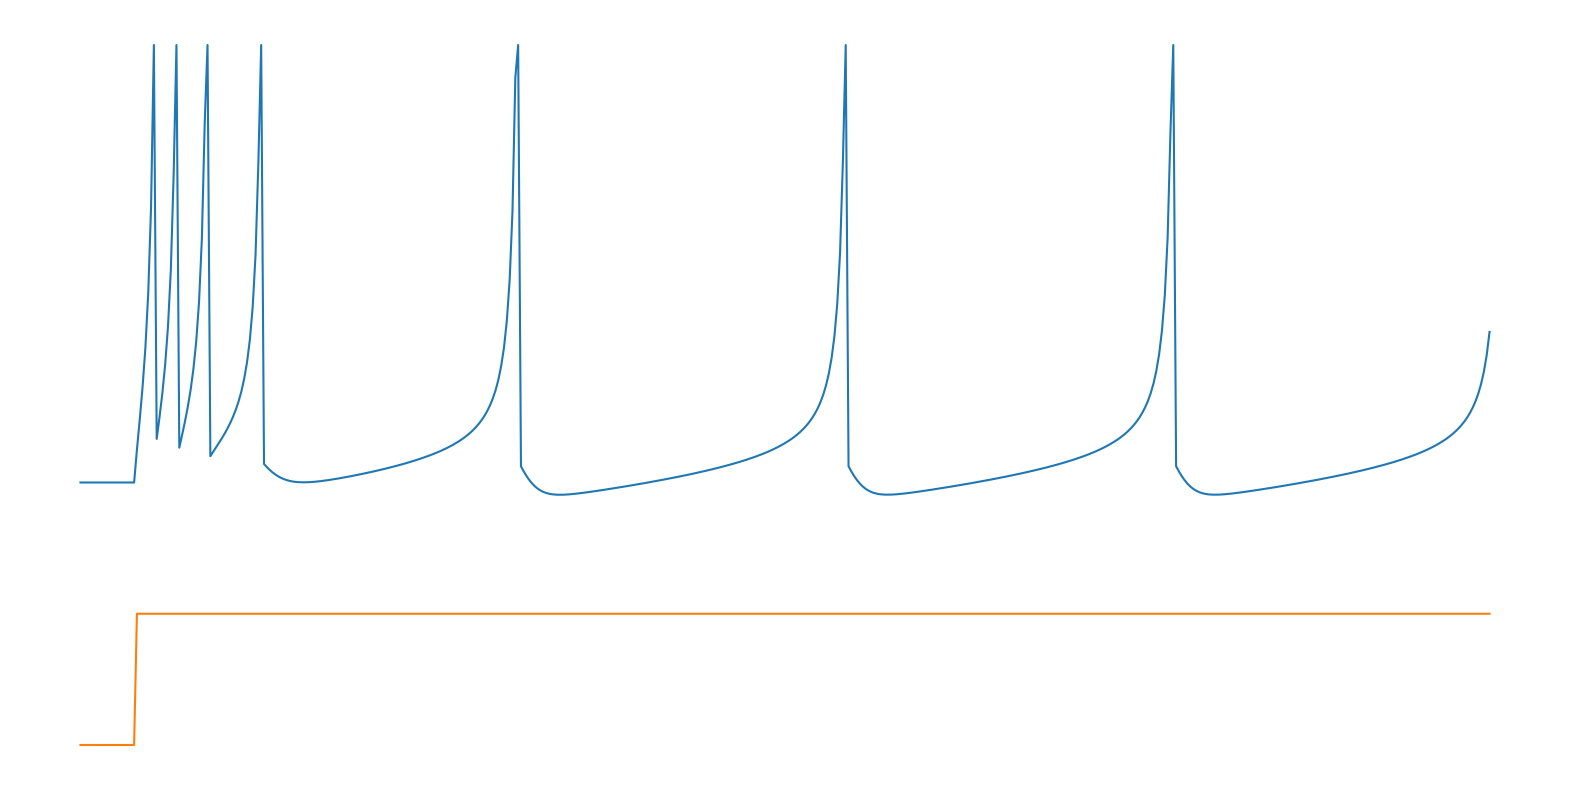

In [23]:
spike_frequency_adaptation = IzhikevichModel(a = 0.01, b = 0.2, c = -65, d = 8, I = I, u = -70, w = 0.2*-70)

# Simulate the model
t, u, w, spikes = spike_frequency_adaptation.simulate(T=T, I=I)

# This value is only used because of the sovrapposition in the plot
graphical_fix_value = 30

draw_spiking_behaviour(t, u, I-graphical_fix_value, spikes, T1)

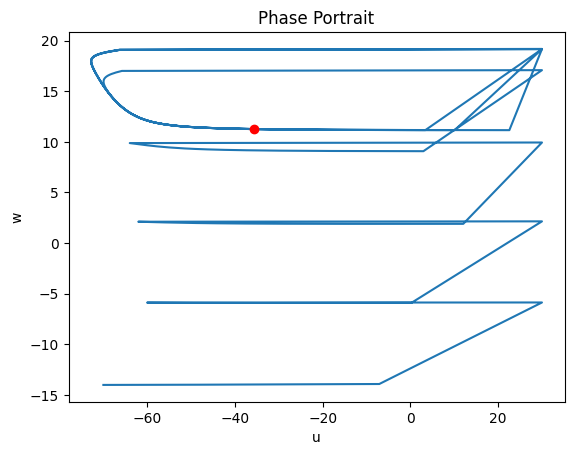

In [24]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 7. Class 1 Excitability

In [25]:
# Current

T = 500
T1 = 30
#I = np.zeros(T)
I = []
current_input = 0.075

#I = np.full(T, 20)

# make current go from 0 slowly up by each step (0.25) in T multipling by current_input by t - T1 when t > T1

for t in np.arange(T, step=0.25):
    if t < T1:
        I.append(0)
    else:
        I.append(current_input * (t-T1))
        

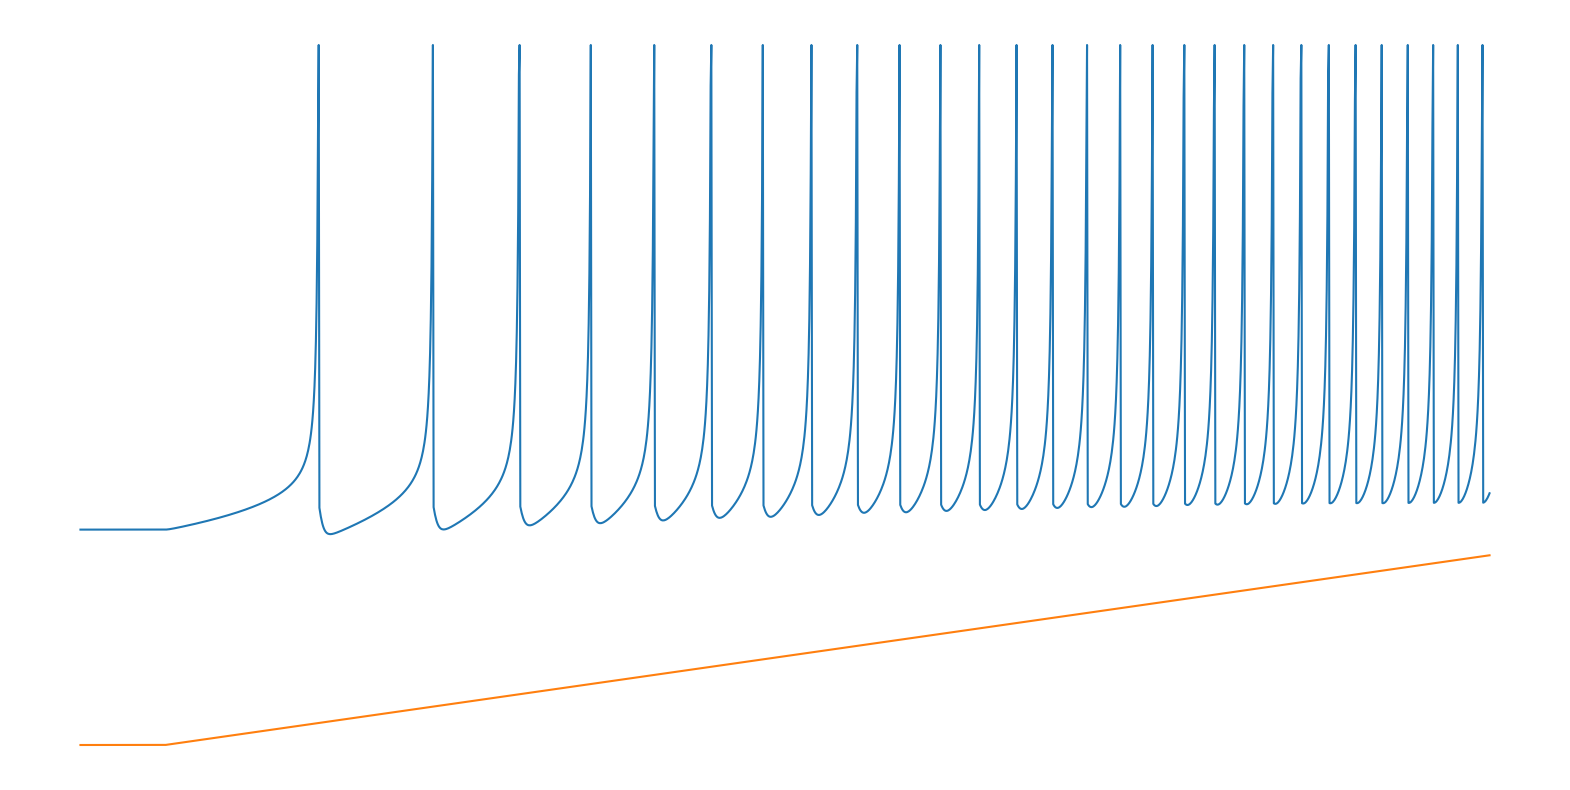

In [26]:

class_1_exitability = IzhikevichModel(a = 0.02, b = -0.1, c = -55, d = 6, u = -60, w = -0.1*-60, I=I, excitability_class=1)
# Simulate the model
t, u, w, spikes = class_1_exitability.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1, offset=0)

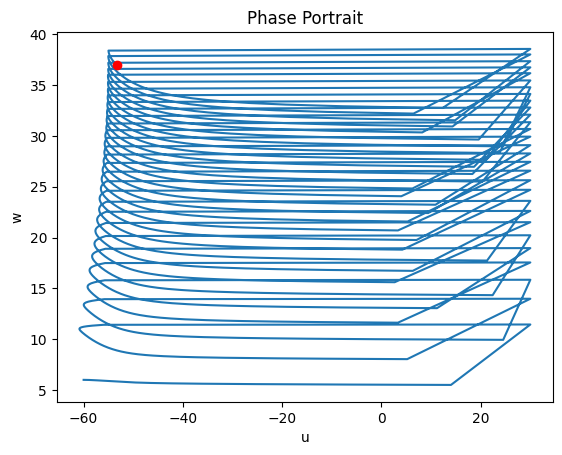

In [27]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 8. Class 2 Excitability 

In [28]:
# Current

T = 500
T1 = T//10
#I = np.zeros(T)
I = []
current_input = 0.015

#I = np.full(T, 20)

# make current go from 0 slowly up by each step (0.25) in T multipling by current_input by t - T1 when t > T1

for t in np.arange(T, step=0.25):
    if t < T1:
        I.append(-0.5)
    else:
        I.append(-0.5+(current_input * (t-T1)))
        

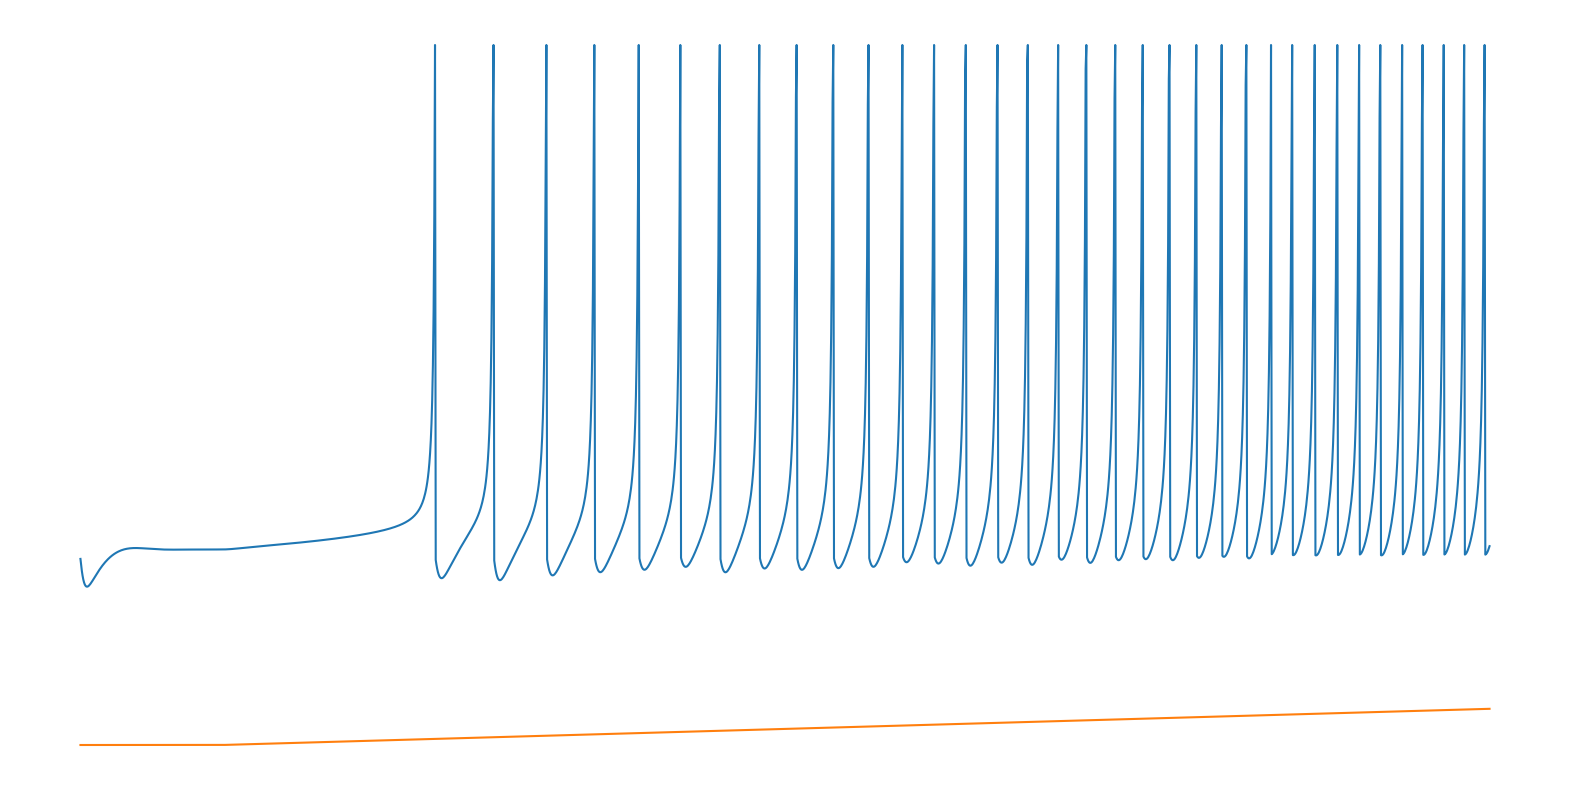

In [29]:
class_2_excitability = IzhikevichModel(a = 0.2, b = 0.26, c = -65, d = 0, u = -64, w = 0.26*-64, I=I)

# Simulate the model
class_2_excitability.simulate(T=T, I=I)

t, u, w, spikes = class_2_excitability.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

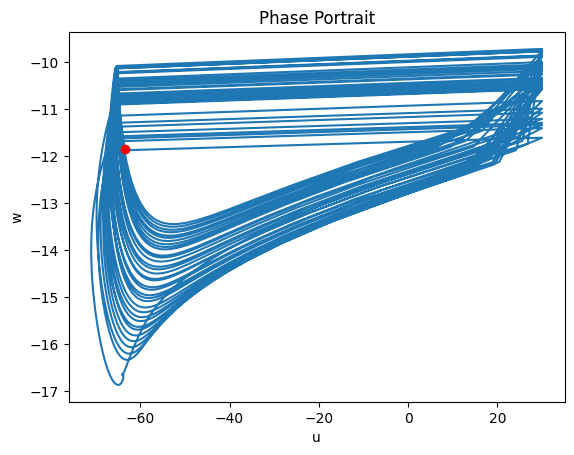

In [30]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 9. Spike Latency

In [31]:
# Current

T = 100
T1 = T//10
#I = np.zeros(T)
I = []

current_input = 7.04

#I = np.full(T, 20)

# make current go from 0 slowly up by each step (0.25) in T multipling by current_input by t - T1 when t > T1

for t in np.arange(T, step=0.2):
    if t > T1 and t < T1+3 :
        I.append(current_input)
    else:
        I.append(0)
        

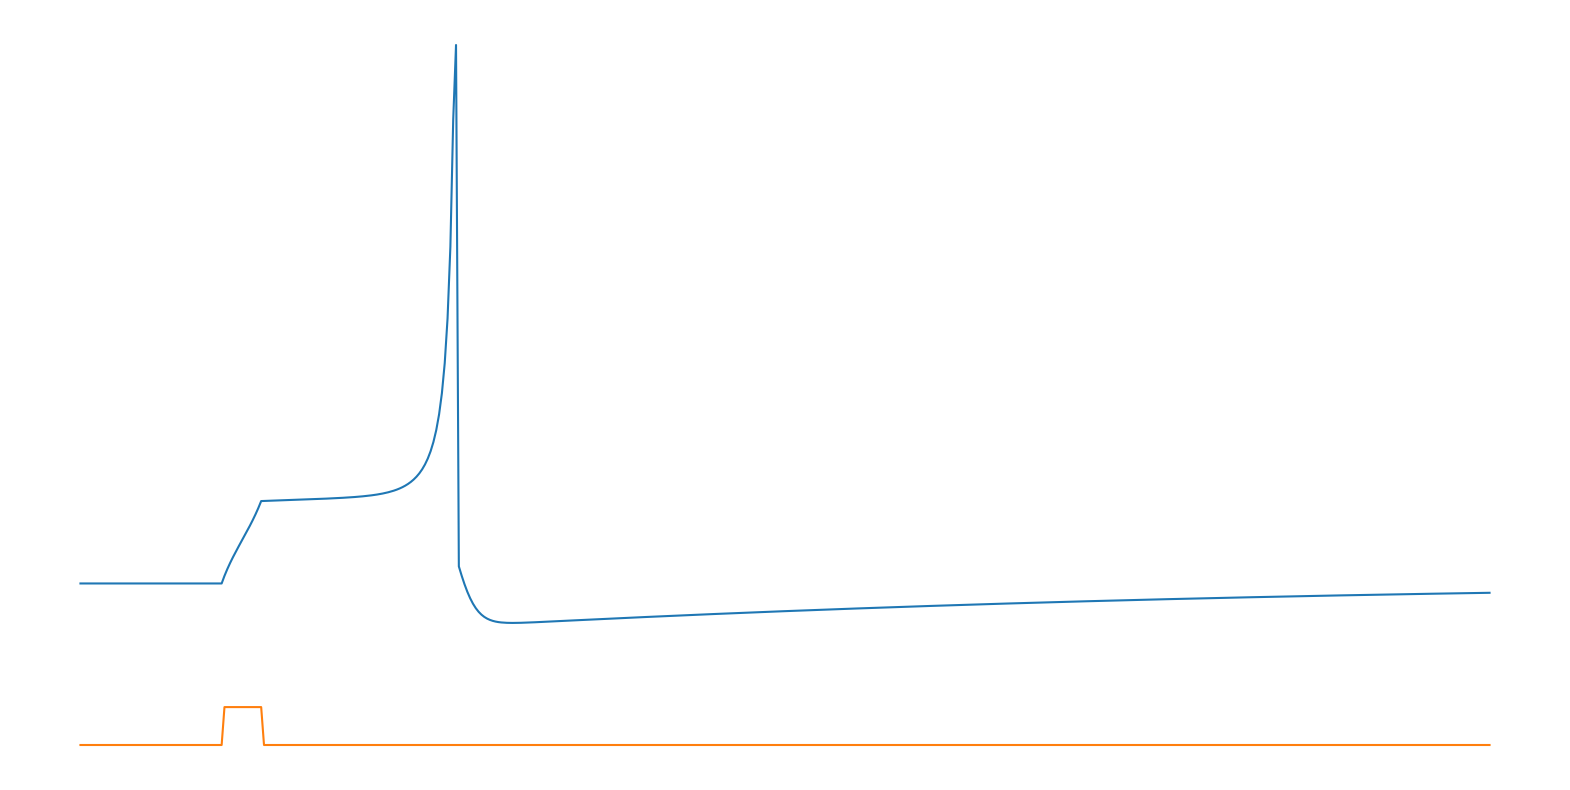

In [32]:
spike_latency = IzhikevichModel(a = 0.02, b = 0.2, c = -65, d = 6, u = -70, w = 0.2*-70, I=I, tau = 0.2)

# Simulate the model
t, u, w, spikes = spike_latency.simulate(T=T, I=I)
draw_spiking_behaviour(t, u, I, spikes, T1)


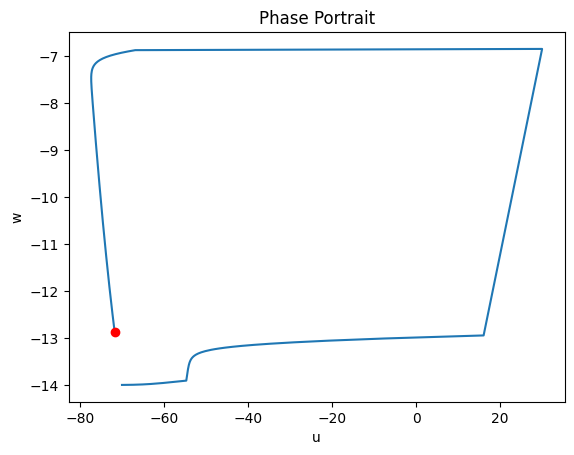

In [33]:
draw_phase_portrait((u,w), title='Phase Portrait')

# 10. Bistability

In [34]:
# Current

T = 300
T1 = T//8
T2 = 216
#I = np.zeros(T)
I = []

current_input_1 = 1.24
current_input_2 = 0.24
#I = np.full(T, 20)

# make current go from 0 slowly up by each step (0.25) in T multipling by current_input by t - T1 when t > T1

for t in np.arange(T, step=0.25):
    if ((t > T1) and t < (T1+5)) or ((t > T2) and (t < T2+5)):
        I.append(current_input_1)
    else:
        I.append(current_input_2)

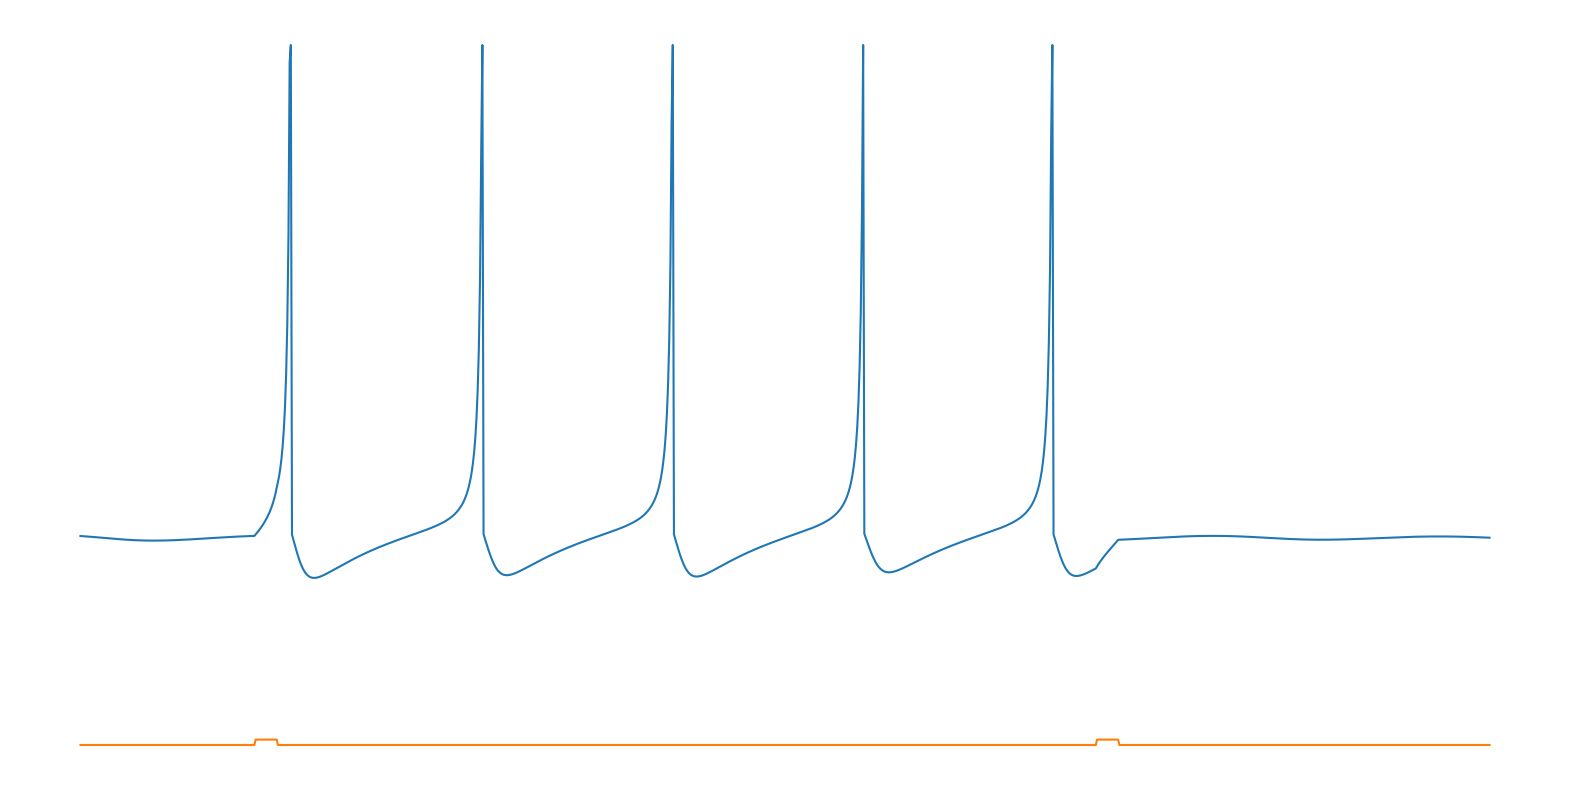

In [35]:
bistability = IzhikevichModel(a = 0.1, b = 0.26, c = -60, d = 0, u = -61, w = 0.26*-61, I=I)

# Simulate the model
t, u, w, spikes = bistability.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

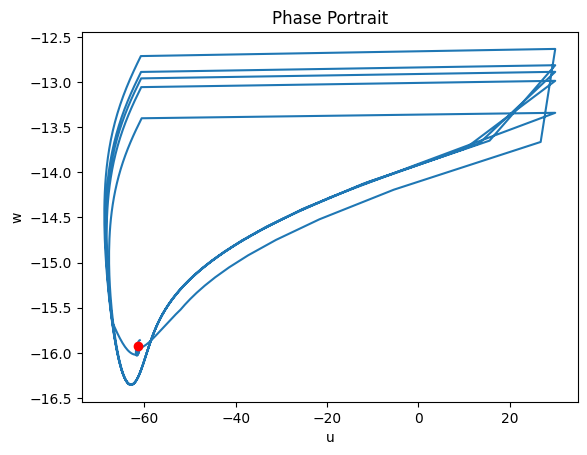

In [36]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 11. Depolarizing After-Potential

In [37]:
# Current

T = 50
T1 = 10
I = []

current_input = 20

for t in np.arange(T, step=0.1):
    if np.abs(t-T1) < 1:
        I.append(current_input)
    else:
        I.append(0)

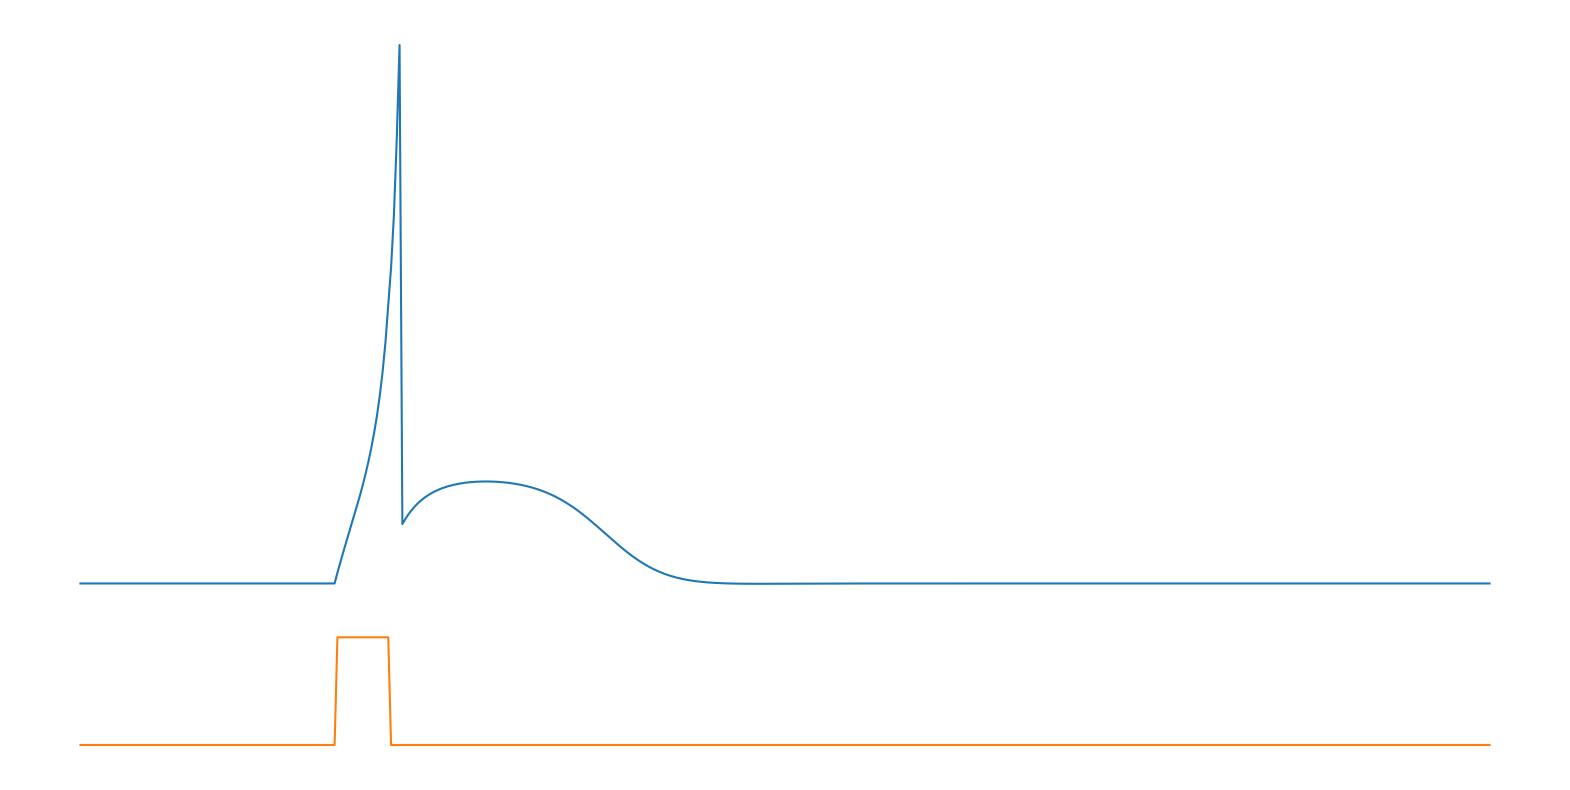

In [38]:
depolarizing_after_potential = IzhikevichModel(a = 1, b = 0.2, c = -60, d = -21, u = -70, w = -70*0.2, tau = 0.1, I=I)

# Simulate the model
t, u, w, spikes = depolarizing_after_potential.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

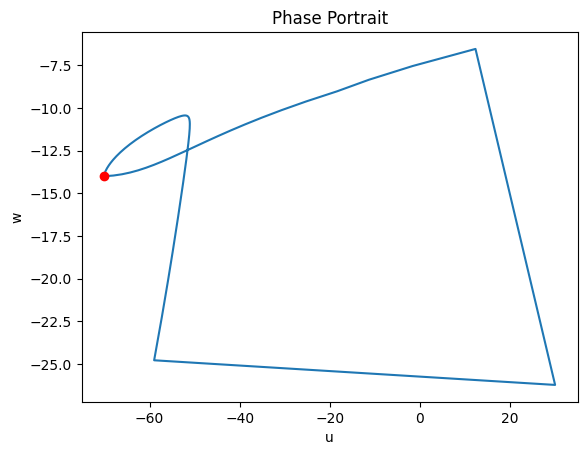

In [39]:

draw_phase_portrait((u,w), title='Phase Portrait')

# 12. Accomodation 

In [40]:
# Current

T = 400
T1 = 10
I = []
supp = 0

for t in np.arange(T, step=0.5):
        if (t < 200):
            supp = t/25
        elif t < 300:
            supp = 0
        elif t < 312.5:
            supp = (t-300)/12.5*4            
        else:
            supp = 0
     
        I.append(supp)
        

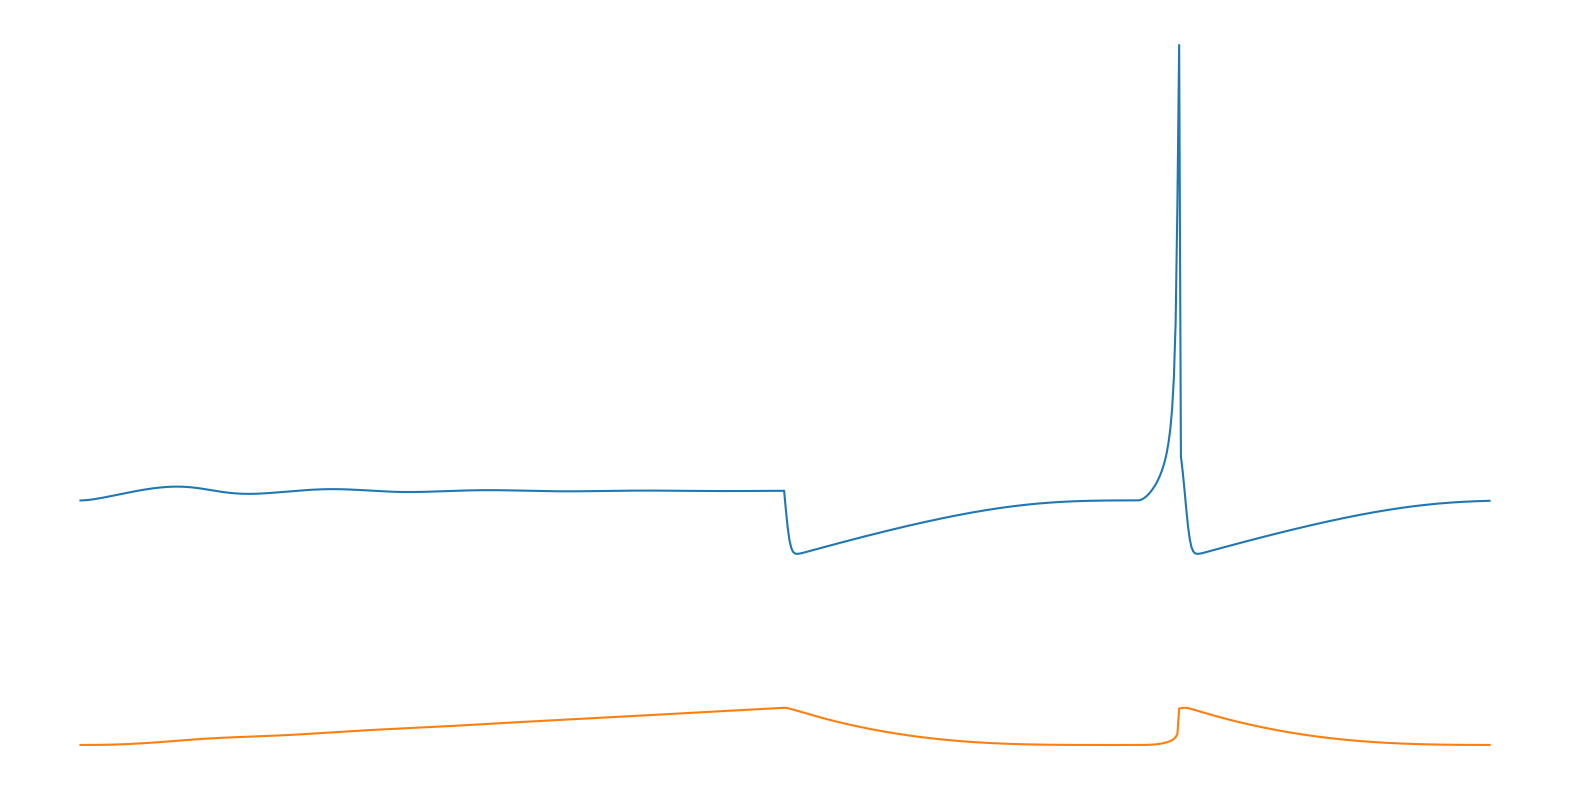

In [41]:
accomodation = IzhikevichModel(a = 0.02, b = 1, c = -55, d = 4, u = -65, w = -16, tau = 0.5, I=I, excitability_class=2)

# Simulate the model
t, u, w, spikes = accomodation.simulate(I=I, T=T)

draw_spiking_behaviour(t, u, w, spikes, T1)

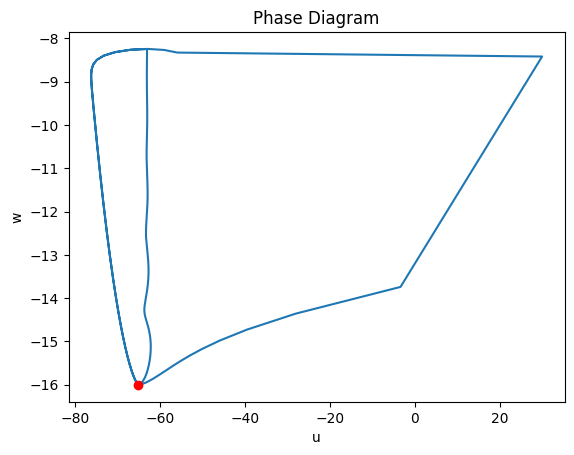

In [42]:
draw_phase_portrait((u,w), 'Phase Diagram')

# 13. Inhibition induced spike

In [43]:
# Current

T = 350
T1 = 80
T2 = 75
I = []
supp = 0

for t in np.arange(T, step=0.5):

    if t < 50 or t > 250:
        I.append(T1)
    else:
        I.append(T2)

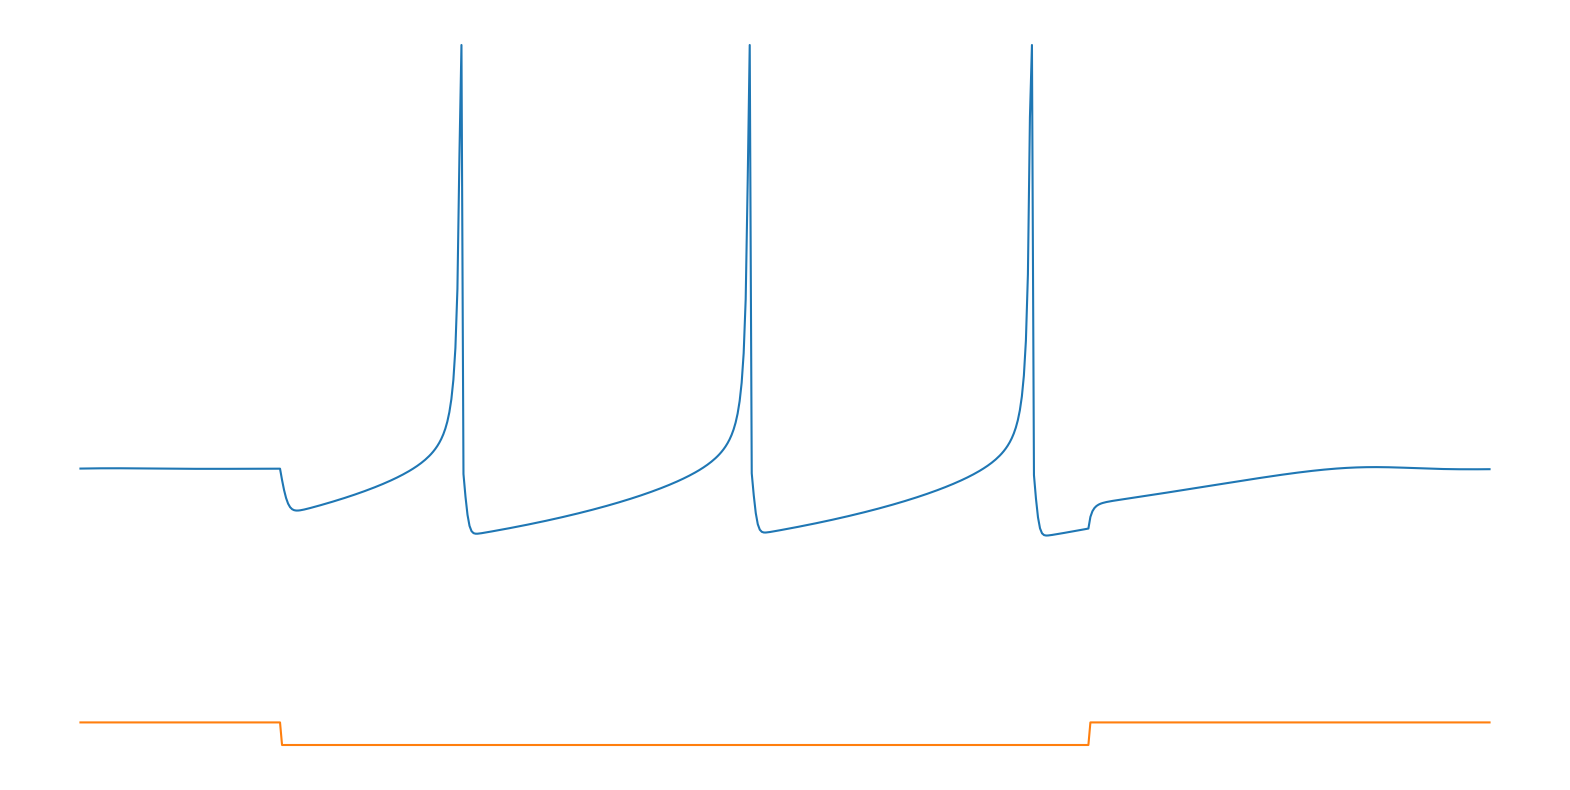

In [44]:
inibhition_induced_spike = IzhikevichModel(a = -0.02, b = -1, c = -60, d = 8, u = -63.8, w = -1*(-63.8), tau = 0.5, I=I)

# Simulate the model
t, u, w, spikes = inibhition_induced_spike.simulate(I=I, T=T)

draw_spiking_behaviour(t, u, I, spikes, T1, offset=100)

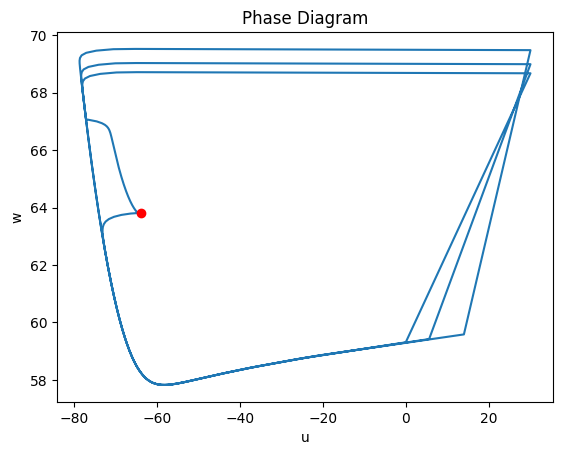

In [45]:
draw_phase_portrait((u,w), 'Phase Diagram')

# 14. Inhibition induced bursting

In [46]:
# Current

T = 350
T1 = 80
T2 = 75
I = []
supp = 0

for t in np.arange(T, step=0.5):

    if t < 50 or t > 250:
        I.append(T1)
    else:
        I.append(T2)
        

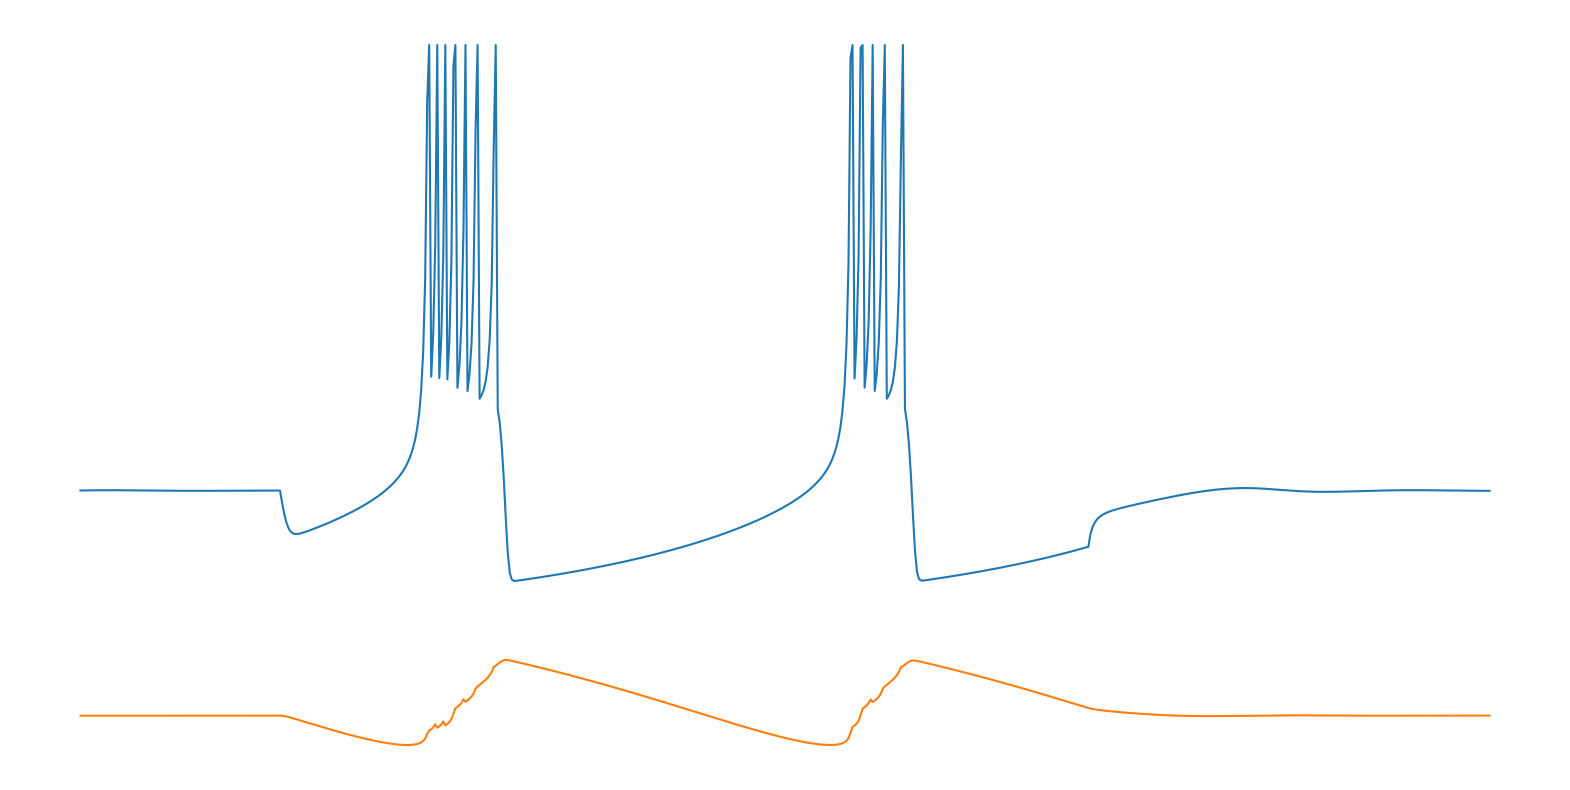

In [47]:
inibhition_induced_bursting = IzhikevichModel(a = -0.026, b = -1, c = -45, d = -2, u = -63.8, w = -1*-63.8, I=I, tau = 0.5)

# Simulate the model

t, u, w, spikes = inibhition_induced_bursting.simulate(I=I, T=T)

draw_spiking_behaviour(t, u, w, spikes, T1, offset=75)

# 15. Resonator

In [48]:
# Current

T = 500
T1 = 20
T2 = T1 + 20    
T3 = 0.7 * 500
T4 = T3 + 40

I = []

current_input = 0.65

# construct a vector only activates in the time t1-t2 then zero then 
# like this  I = 0.65 if ((t>T1) and (t < T1+4)) or ((t>T2) and (t < T2+4)) or ((t>T3) and (t < T3+4)) or ((t>T4) and (t < T4+4))  else 0

# create a support variable t to cycle in order to create the vector
t = np.arange(0, T, 0.25)

for i in range(len(t)):
    if (t[i] > T1 and t[i] < T1+4) or (t[i] > T2 and t[i] < T2+4) or (t[i] > T3 and t[i] < T3+4) or (t[i] > T4 and t[i] < T4+4):
        I.append(current_input)
    else:
        I.append(0)

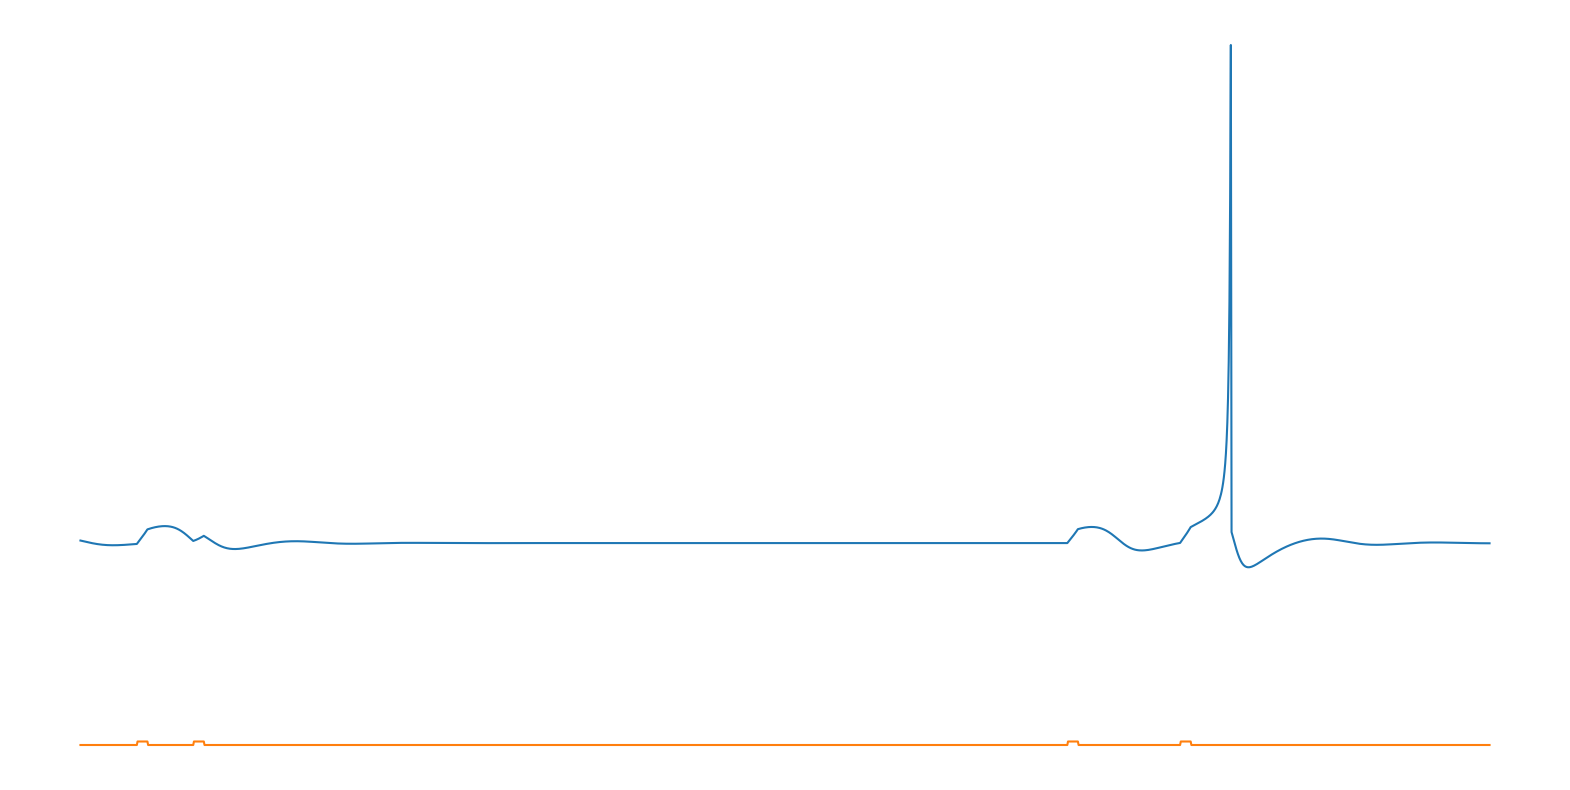

In [49]:
resonator = IzhikevichModel(a = 0.1, b = 0.26, c = -60, d = -1, u = -62, w = 0.26*-62, I = I)

# Simulate the model
t, u, w, spikes = resonator.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, T1=T1, spikes = spikes)

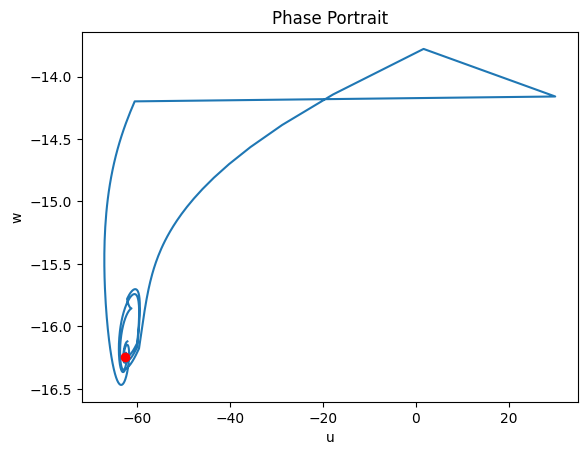

In [50]:
draw_phase_portrait((u, w), 'Phase Portrait')

# 16. Subtreshold Oscillations

In [51]:
# Current

T = 200
T1 = T/10

I = []
supp = 0

for t in np.arange(T, step=0.25):

    if t > T1 and t < T1+5:
        I.append(2)
    else:
        I.append(0)
        

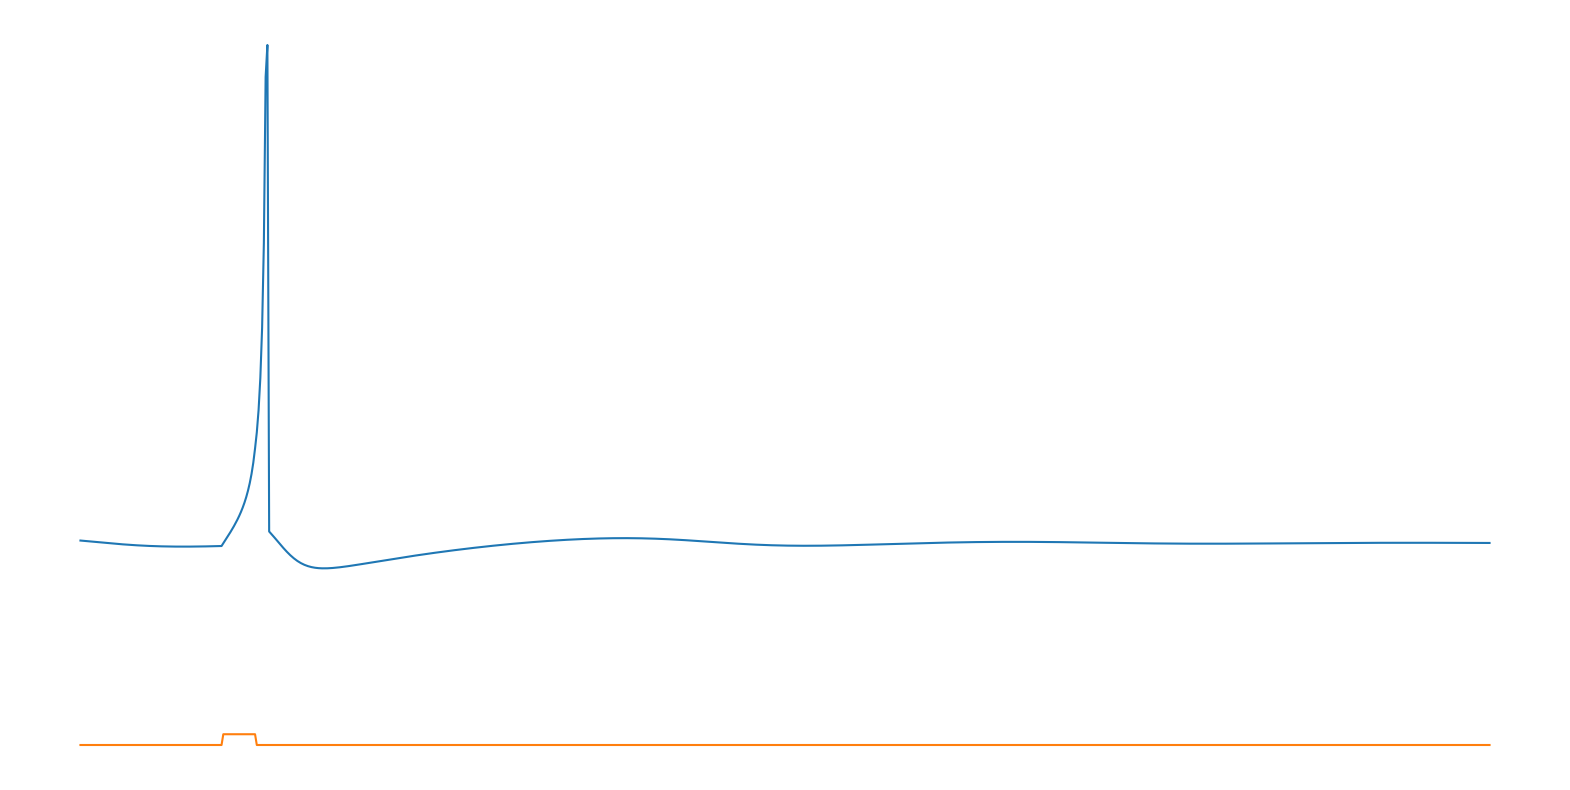

In [52]:
subtreshold_oscillations = IzhikevichModel(a = 0.05, b = 0.26, c = -60, d = 0, u = -62, w = 0.26*-62, I=I)

# Simulate the model
t, u, w, spikes = subtreshold_oscillations.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)



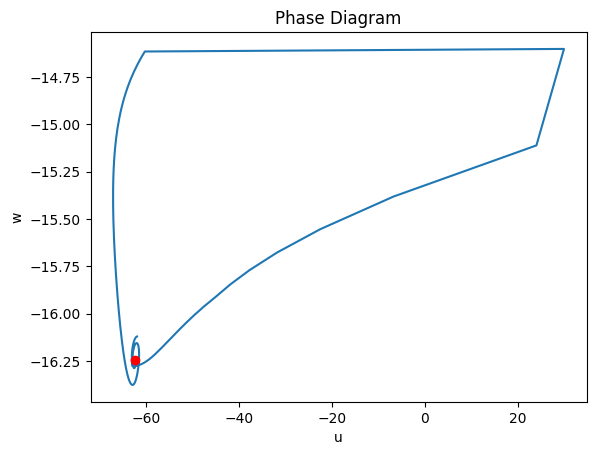

In [53]:
draw_phase_portrait((u,w), 'Phase Diagram')

# 17. Integrator

In [54]:
# Current

T = 100
T1 = T/11
T2 = T1 + 5    
T3 = 0.7 * T
T4 = T3 + 10

I = []

current_input = 9

# construct a vector only activates in the time t1-t2 then zero then 
# like this  I = 0.65 if ((t>T1) and (t < T1+4)) or ((t>T2) and (t < T2+4)) or ((t>T3) and (t < T3+4)) or ((t>T4) and (t < T4+4))  else 0

# create a support variable t to cycle in order to create the vector
t = np.arange(0, T, 0.25)

for i in range(len(t)):
    if (t[i] > T1 and t[i] < T1+2) or (t[i] > T2 and t[i] < T2+2) or (t[i] > T3 and t[i] < T3+2) or (t[i] > T4 and t[i] < T4+2):
        I.append(current_input)
    else:
        I.append(0)
        

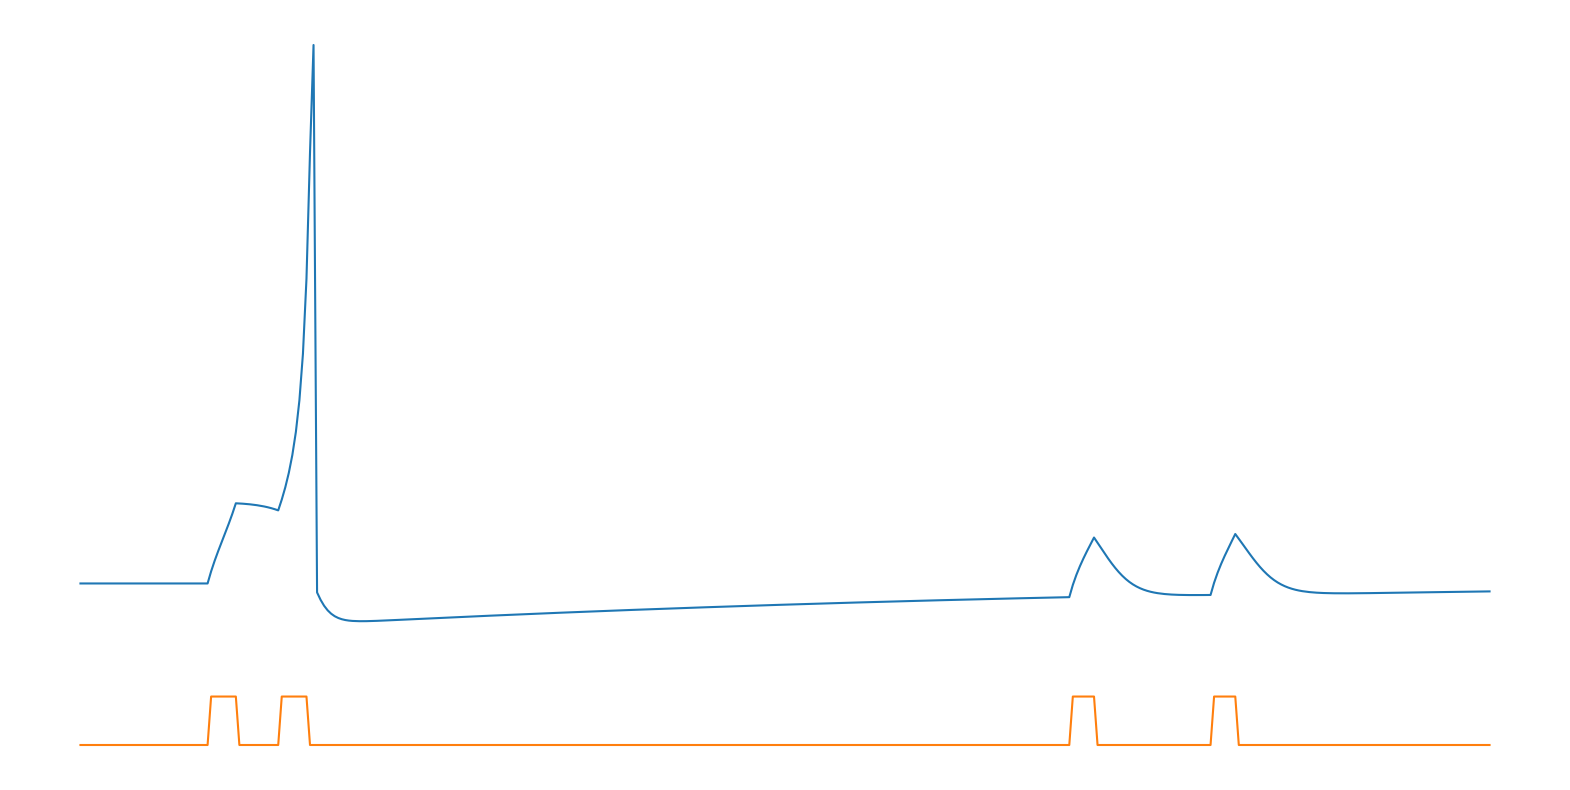

In [55]:
integrator = IzhikevichModel(a = 0.02, b = 0.2, c = -70, d = 6, u = -70, w = 0.2*-70, I=I)

# Simulate the model
t, u, w, spikes = integrator.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

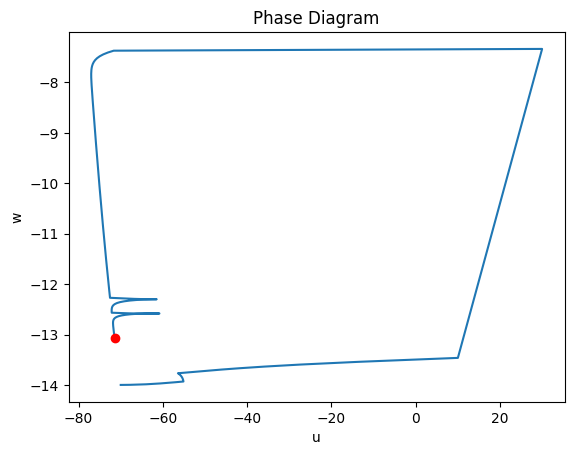

In [56]:
draw_phase_portrait((u,w), 'Phase Diagram')

# 18. Rebound spike

In [61]:
# Current

I = []

current_input = -15

T = 200
T1 = 20
T2 = T1+5

for t in np.arange(T, step=0.2):

    if t > T1 and t < T2:
        I.append(current_input)
    else:
        I.append(0)



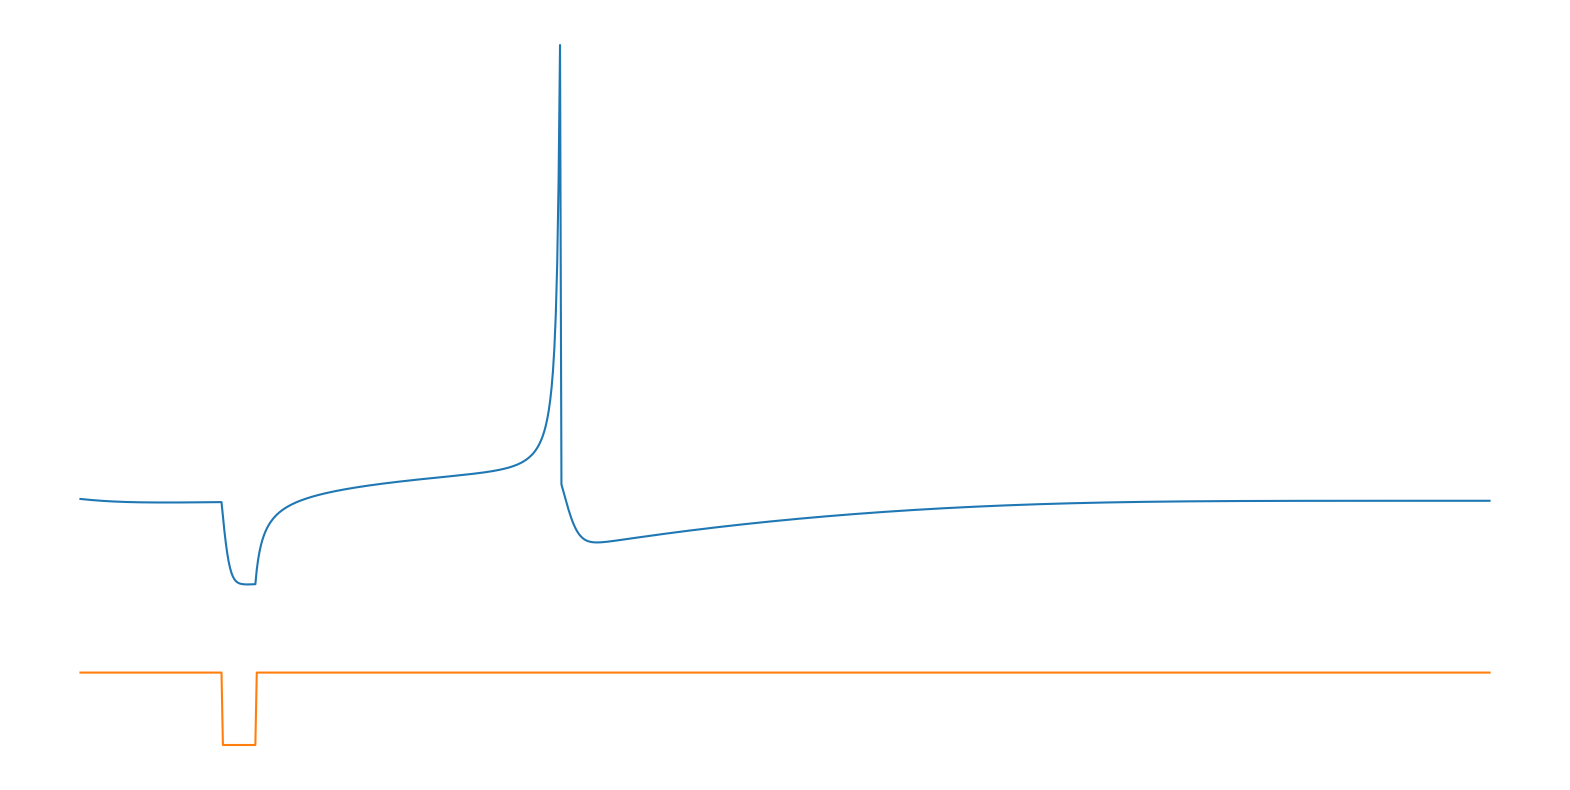

In [62]:
rebound_spike = IzhikevichModel(a = 0.03, b = 0.25, c = -60, d = 4, u = -64, w = 0.25*-64, I=I, tau = 0.2)

# Simulate the model
t, u, w, spikes = rebound_spike.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

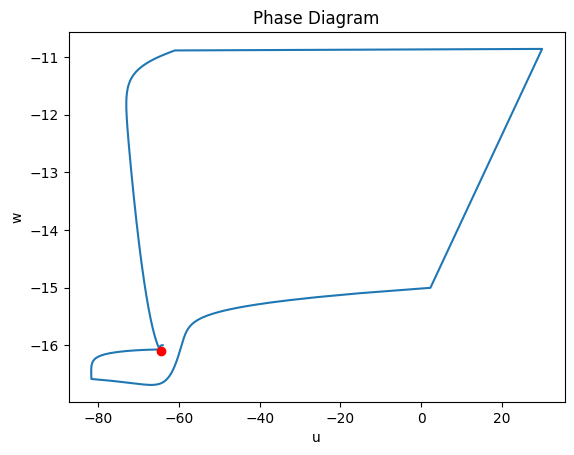

In [64]:
draw_phase_portrait((u,w), 'Phase Diagram')

# 19. Rebound burst 

In [65]:
# Current

I = []

current_input = -15

T = 200
T1 = 20
T2 = T1+5

for t in np.arange(T, step=0.2):

    if t > T1 and t < T2:
        I.append(current_input)
    else:
        I.append(0)


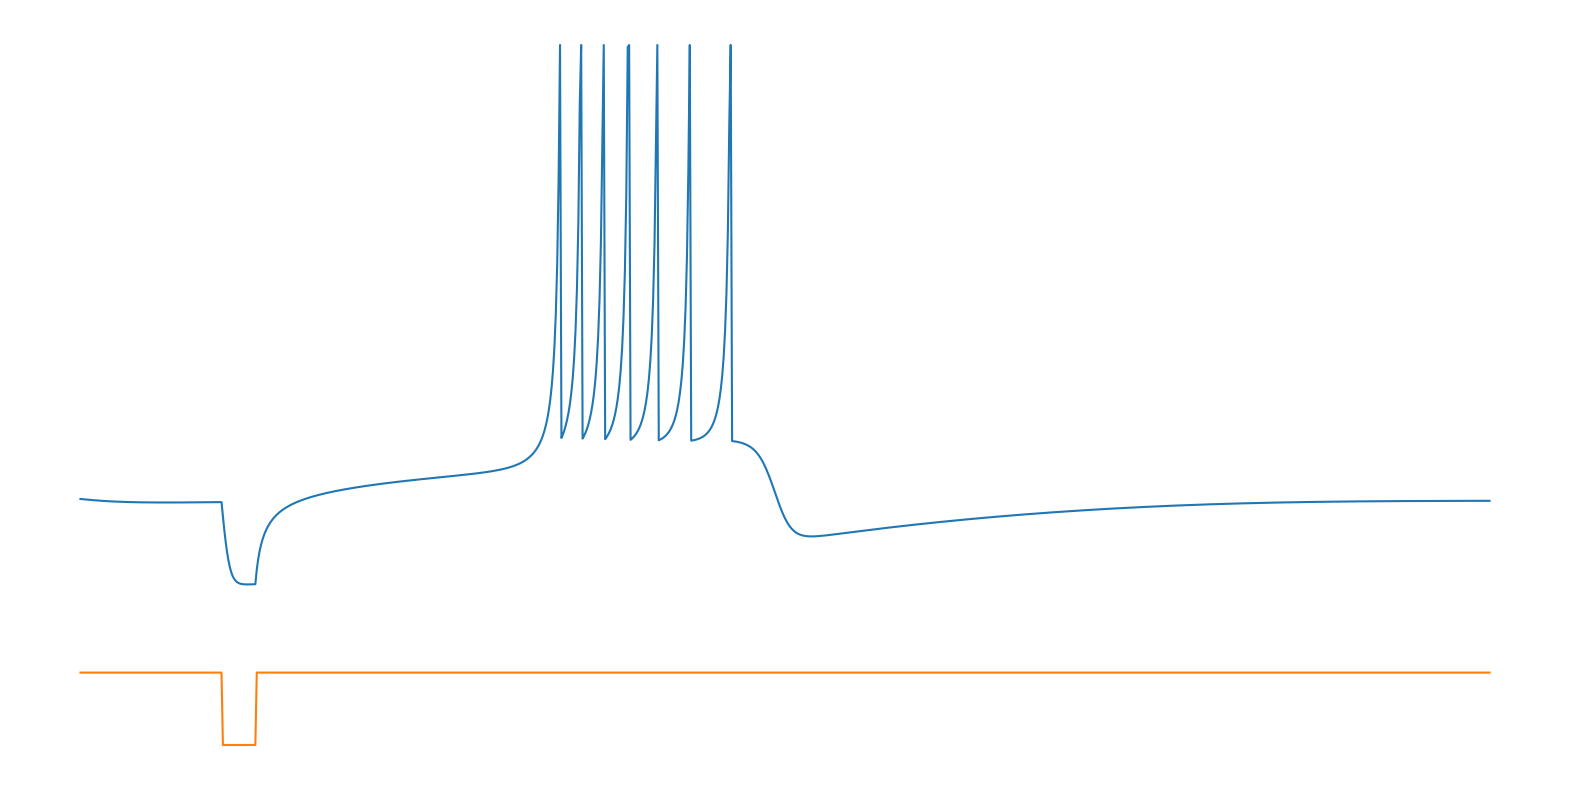

In [66]:
rebound_burst = IzhikevichModel(a = 0.03, b = 0.25, c = -52, d = 0, u = -64, w = 0.25*-64, I=I, tau = 0.2)

# Simulate the model
t, u, w, spikes = rebound_burst.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)

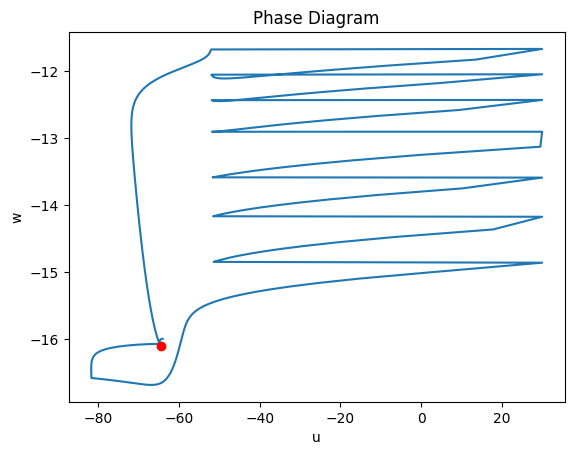

In [67]:
draw_phase_portrait((u,w), 'Phase Diagram')

# 20. Treshold variability

In [68]:
# Current

I = []

current_input = -15

T = 100

for t in np.arange(T, step=0.25):

    if (t > 10 and t < 15) or (t > 80 and t < 85):
        I.append(1)
    elif t > 70 and t < 75:
        I.append(-6)
    else:
        I.append(0)


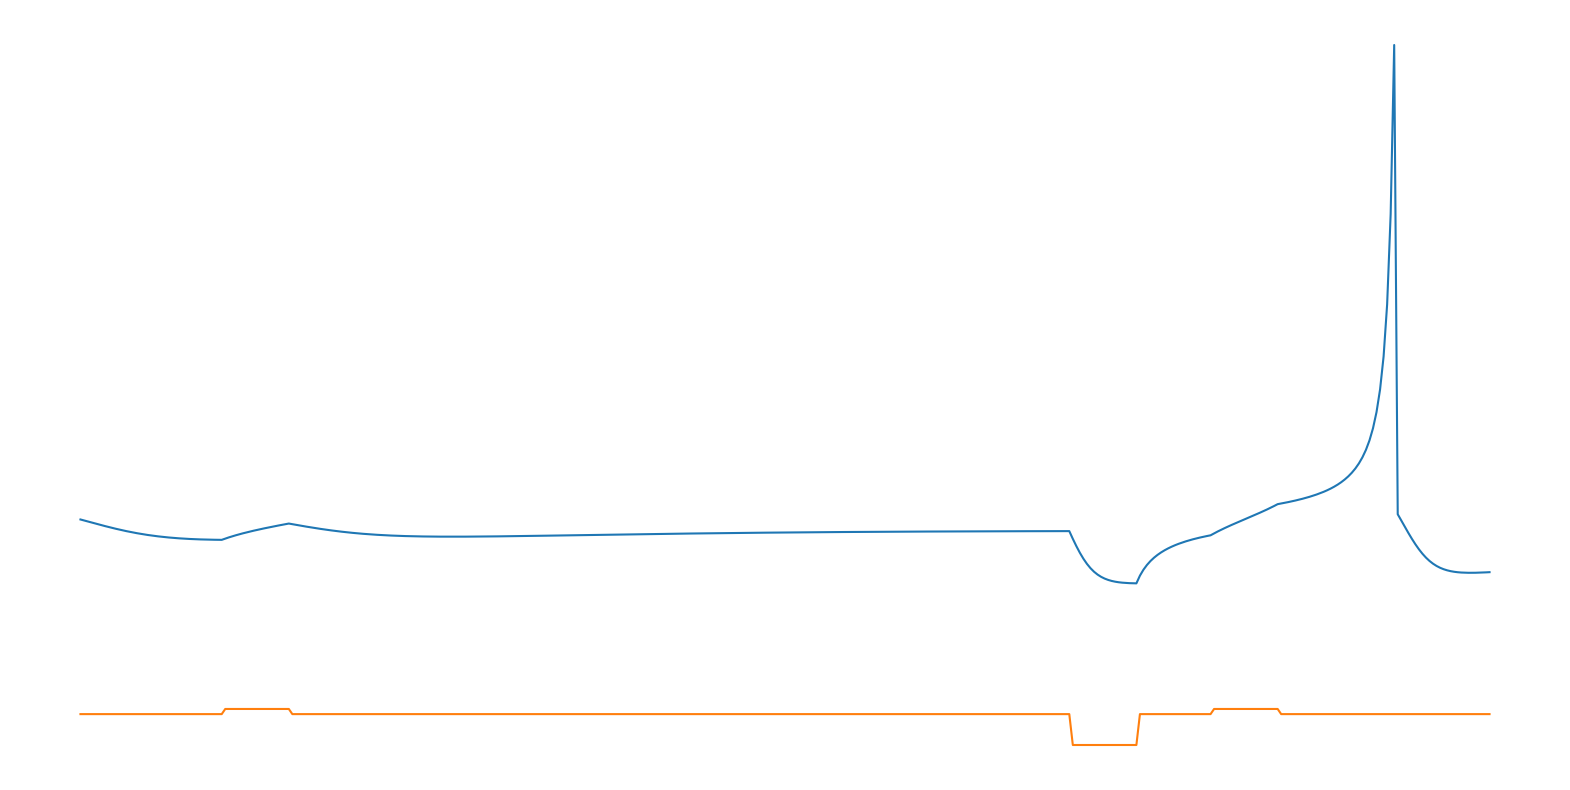

In [69]:
treshold_variability = IzhikevichModel(a = 0.03, b = 0.25, c = -60, d = 4, u = -62, w = 0.25*-62, I=I, tau = 0.25)

# Simulate the model
t, u, w, spikes = treshold_variability.simulate(T=T, I=I)

draw_spiking_behaviour(t, u, I, spikes, T1)


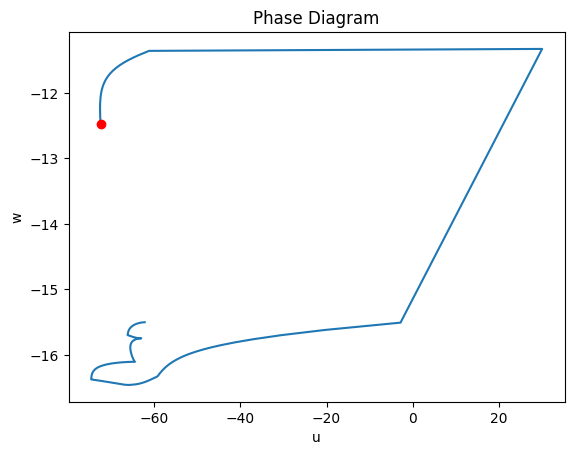

In [70]:
draw_phase_portrait((u,w), 'Phase Diagram')